<a href="https://colab.research.google.com/github/MohamedAziz15/ReggressorCost-Competition/blob/main/Cost_Regressor_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
# for building linear regression models and preparing data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IEEE Competition/AllBatches.csv',sep=",",encoding="UTF-8")

df.head()


,ID,marital state,gender,Number Of Childrens,education,working status,Place Code,Customer Order,department,Ordered Brand,...,Gross Weight,Net Weight,Package Weight,Is Recyclable?,Min. Yearly Income,Frozen Area,Meat Area,Cost,Store Area,Grocery Area
0,mc_ID_0,Single,F,4,bachelors degree,professional,H11go_ZA,Cleaning Supplies,Household,Red Wing,...,28.1997,26.6008,1.5990,1.0,10000.0,481.98,323.00,602.7575,2842.23,2037.64
1,mc_ID_1,Single,F,3,bachelors degree,management,S04ne_WA,Snack Foods,Snack Foods,Nationeel,...,16.5710,14.9720,1.5990,0.0,50000.0,457.36,NaN,708.6650,2814.95,2049.72
2,mc_ID_2,Married,M,2,high school degree,skilled manual,L05es_CA,Magazines,Periodicals,Excel,...,28.6358,27.1822,1.4536,1.0,30000.0,523.32,348.85,564.2647,2192.32,1322.21
3,mc_ID_3,Single,F,3,partial college,professional,S03le_WA,Dairy,Dairy,Carlson,...,14.2161,11.2944,2.9217,1.0,30000.0,440.92,293.95,724.5119,1974.73,NaN
4,mc_ID_4,Married,F,5,bachelors degree,professional,M10da_YU,Vegetables,Produce,Hermanos,...,12.6172,9.7100,2.9072,0.0,50000.0,593.93,395.95,519.7574,2862.30,1872.19


# Data Preview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38862 entries, 0 to 38861
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             25906 non-null  object 
 1   marital state                  38862 non-null  object 
 2   gender                         38862 non-null  object 
 3   Number Of Childrens            38862 non-null  int64  
 4   education                      38862 non-null  object 
 5   working status                 38862 non-null  object 
 6   Place Code                     38862 non-null  object 
 7   Customer Order                 38860 non-null  object 
 8   department                     38860 non-null  object 
 9   Ordered Brand                  38860 non-null  object 
 10  Additional Features in market  34562 non-null  object 
 11  Promotion Name                 33034 non-null  object 
 12  Store Kind                     33053 non-null 

In [4]:
df.describe()

,Number Of Childrens,Store Sales,Store Cost,Gross Weight,Net Weight,Package Weight,Is Recyclable?,Min. Yearly Income,Frozen Area,Meat Area,Cost,Store Area,Grocery Area
count,38862.000000,25893.000000,25899.000000,36920.000000,36924.000000,35284.000000,19440.000000,38854.000000,35308.000000,35312.000000,38831.000000,35296.000000,35253.000000
mean,2.528331,6.539923,2.616668,20.054378,17.141925,2.925647,0.558025,48411.489165,493.541748,328.944921,519.224643,2597.993526,1775.509665
std,1.488920,3.456732,1.447893,6.716412,6.813656,1.010982,0.496634,36239.308013,145.973261,97.120302,156.875169,528.796266,371.303570
min,0.000000,0.510000,0.163200,8.721600,4.433500,1.453500,0.000000,10000.000000,227.800000,149.900000,265.631700,1882.700000,1233.080000
25%,1.000000,3.810000,1.497800,14.056200,11.207200,2.907100,0.000000,30000.000000,440.920000,293.277500,364.269500,2189.410000,1507.540000
50%,3.000000,5.920000,2.376000,19.768900,16.861700,2.907200,1.000000,30000.000000,470.270000,313.550000,515.259600,2572.860000,1734.500000
75%,4.000000,8.680000,3.484600,25.728600,23.257500,3.052500,1.000000,70000.000000,534.290000,356.190000,662.222600,2863.822500,2052.610000
max,5.000000,19.900000,9.384000,31.833700,30.234700,4.506200,1.000000,150000.000000,1783.640000,570.740000,783.192500,7857.550000,8103.200000


In [5]:
df.shape

(38862, 25)

In [6]:
df.corr()

<ipython-input-6-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Number Of Childrens,Store Sales,Store Cost,Gross Weight,Net Weight,Package Weight,Is Recyclable?,Min. Yearly Income,Frozen Area,Meat Area,Cost,Store Area,Grocery Area
Number Of Childrens,1.000000,0.083521,0.077295,-0.003543,-0.003419,-0.005100,0.007935,-0.008837,-0.025374,-0.029307,-0.008209,-0.000727,0.014984
Store Sales,0.083521,1.000000,0.954088,0.040320,0.037016,0.018535,0.033915,0.001978,0.015373,0.013480,-0.007844,0.023657,0.013993
Store Cost,0.077295,0.954088,1.000000,0.040458,0.037347,0.017225,0.031196,0.001670,0.017209,0.015158,-0.009438,0.025833,0.016574
Gross Weight,-0.003543,0.040320,0.040458,1.000000,0.988917,-0.015545,0.051160,0.001785,-0.003228,-0.004203,-0.002982,-0.002060,-0.004931
Net Weight,-0.003419,0.037016,0.037347,0.988917,1.000000,-0.163821,0.053975,0.001884,-0.000091,-0.001578,-0.001335,-0.001631,-0.006284
Package Weight,-0.005100,0.018535,0.017225,-0.015545,-0.163821,1.000000,-0.024112,0.000921,-0.000842,0.000952,0.000502,-0.001011,-0.003921
Is Recyclable?,0.007935,0.033915,0.031196,0.051160,0.053975,-0.024112,1.000000,-0.000046,0.004568,-0.003305,-0.006578,0.000572,0.004810
Min. Yearly Income,-0.008837,0.001978,0.001670,0.001785,0.001884,0.000921,-0.000046,1.000000,-0.000636,-0.001023,-0.007051,0.002815,0.007332
Frozen Area,-0.025374,0.015373,0.017209,-0.003228,-0.000091,-0.000842,0.004568,-0.000636,1.000000,0.999228,-0.043795,0.783248,0.462164
Meat Area,-0.029307,0.013480,0.015158,-0.004203,-0.001578,0.000952,-0.003305,-0.001023,0.999228,1.000000,-0.045041,0.783758,0.465852


#### plotting Correlation

<ipython-input-7-fa256436df5e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

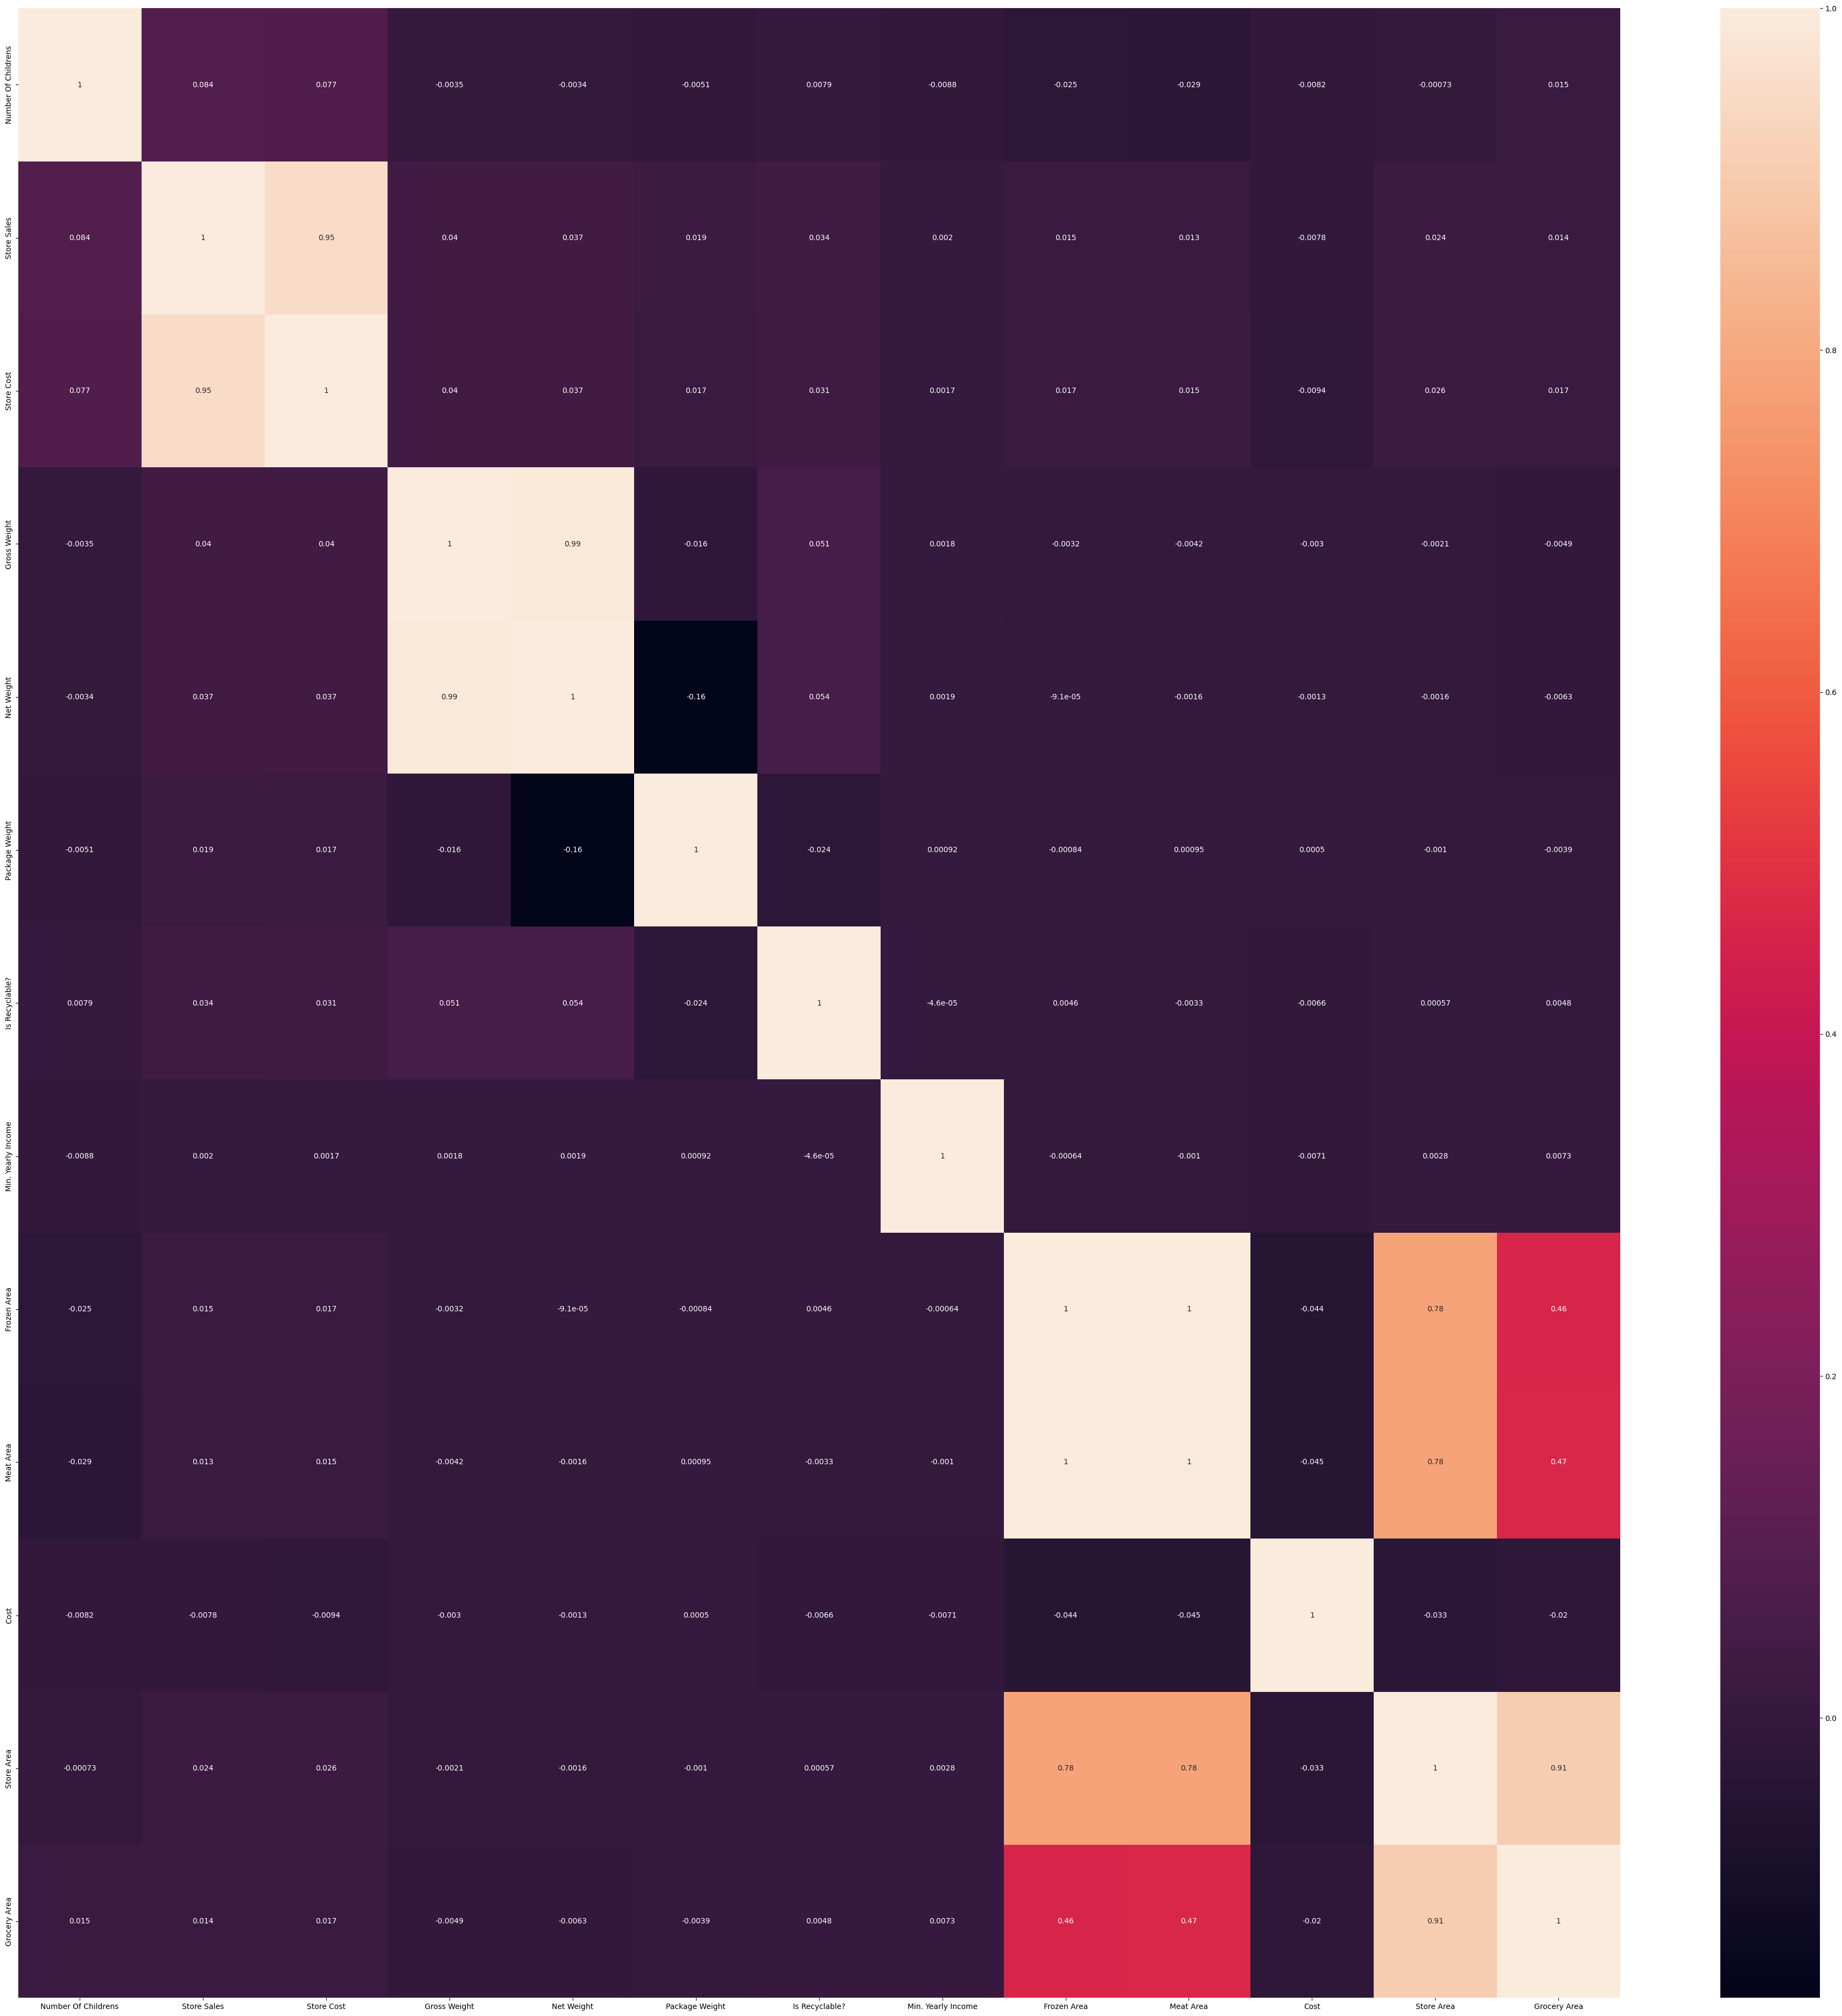

In [7]:
plt.subplots(figsize = (48, 48))
sns.heatmap(df.corr(), annot = True)

In [8]:
# correlationC=[]
# for column in df.columns :
#     for columnC in df.columns:
#         a = df[column].corr(df[columnC])
#         if a > 0.8 and (column != columnC) :
#             if a in correlationC:
#                 continue
#             else :
#                 correlationC.append(a)
#                 print (column +" column has high correlation with column "+ columnC)
#                 print(df[column].corr(df[columnC]))
#                 print("*******************************")

In [9]:
df_copy = df[:]
df_copy

,ID,marital state,gender,Number Of Childrens,education,working status,Place Code,Customer Order,department,Ordered Brand,...,Gross Weight,Net Weight,Package Weight,Is Recyclable?,Min. Yearly Income,Frozen Area,Meat Area,Cost,Store Area,Grocery Area
0,mc_ID_0,Single,F,4,bachelors degree,professional,H11go_ZA,Cleaning Supplies,Household,Red Wing,...,28.1997,26.6008,1.5990,1.0,10000.0,481.98,323.00,602.7575,2842.23,2037.64
1,mc_ID_1,Single,F,3,bachelors degree,management,S04ne_WA,Snack Foods,Snack Foods,Nationeel,...,16.5710,14.9720,1.5990,0.0,50000.0,457.36,NaN,708.6650,2814.95,2049.72
2,mc_ID_2,Married,M,2,high school degree,skilled manual,L05es_CA,Magazines,Periodicals,Excel,...,28.6358,27.1822,1.4536,1.0,30000.0,523.32,348.85,564.2647,2192.32,1322.21
3,mc_ID_3,Single,F,3,partial college,professional,S03le_WA,Dairy,Dairy,Carlson,...,14.2161,11.2944,2.9217,1.0,30000.0,440.92,293.95,724.5119,1974.73,NaN
4,mc_ID_4,Married,F,5,bachelors degree,professional,M10da_YU,Vegetables,Produce,Hermanos,...,12.6172,9.7100,2.9072,0.0,50000.0,593.93,395.95,519.7574,2862.30,1872.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38857,mc_ID_6461,Single,F,4,high school degree,manual,C15ho_ZA,Snack Foods,Snack Foods,Fort West,...,29.2172,27.7636,1.4536,NaN,30000.0,385.45,256.97,773.0986,2207.28,1564.86
38858,mc_ID_6462,Single,M,1,bachelors degree,management,T02ma_WA,Carbonated Beverages,Beverages,Washington,...,22.9668,20.0596,2.9072,NaN,70000.0,654.13,436.09,779.6884,3145.51,2055.29
38859,mc_ID_6463,Married,M,0,partial high school,professional,S03le_WA,Specialty,Produce,Tri-State,...,28.6358,24.2750,4.3608,NaN,90000.0,440.92,293.95,473.7334,1974.49,1236.07
38860,mc_ID_6464,Single,F,1,high school degree,skilled manual,S03le_WA,Jams and Jellies,Baking Goods,Plato,...,30.3801,25.8740,4.5061,NaN,50000.0,440.92,293.95,349.2594,1973.77,1236.07


# Data Preprocessing and Cleaning

In [10]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
38857    False
38858    False
38859    False
38860    False
38861    False
Length: 38862, dtype: bool

In [11]:
df.duplicated().sum()

8

In [12]:
df= df.drop_duplicates()
df.shape

(38854, 25)

In [13]:
df.isnull().any()

ID                                True
marital state                    False
gender                           False
Number Of Childrens              False
education                        False
working status                   False
Place Code                       False
Customer Order                    True
department                        True
Ordered Brand                     True
Additional Features in market     True
Promotion Name                    True
Store Kind                        True
Store Sales                       True
Store Cost                        True
Gross Weight                      True
Net Weight                        True
Package Weight                    True
Is Recyclable?                    True
Min. Yearly Income                True
Frozen Area                       True
Meat Area                         True
Cost                              True
Store Area                        True
Grocery Area                      True
dtype: bool

In [14]:
# for i in range(df.shape[0],32):
#   # if len (df.loc[i,'Additional Features in market']) == 5 :
#     df.loc[i,'ID'] = df['ID'][32395]



In [14]:
df = df.dropna(subset=['Customer Order','department','Ordered Brand','Cost','Min. Yearly Income'])

In [15]:
df['ID'][32398]

'mc_ID_2'

In [15]:
df['ID'].isnull().sum()

12947

In [16]:
df.isnull().sum()

ID                               12947
marital state                        0
gender                               0
Number Of Childrens                  0
education                            0
working status                       0
Place Code                           0
Customer Order                       0
department                           0
Ordered Brand                        0
Additional Features in market     4291
Promotion Name                    5824
Store Kind                        5807
Store Sales                      12960
Store Cost                       12954
Gross Weight                      1942
Net Weight                        1935
Package Weight                    3575
Is Recyclable?                   19408
Min. Yearly Income                   0
Frozen Area                       3546
Meat Area                         3546
Cost                                 0
Store Area                        3563
Grocery Area                      3605
dtype: int64

In [17]:
# Drop the existing 'ID' column
df.drop(columns=['ID'], inplace=True)

# Generate new ordered IDs as a new column
df['ID'] = range(1, len(df) + 1)

In [20]:
df = df.reset_index(drop=True)


In [18]:
df.head()

,marital state,gender,Number Of Childrens,education,working status,Place Code,Customer Order,department,Ordered Brand,Additional Features in market,...,Net Weight,Package Weight,Is Recyclable?,Min. Yearly Income,Frozen Area,Meat Area,Cost,Store Area,Grocery Area,ID
0,Single,F,4,bachelors degree,professional,H11go_ZA,Cleaning Supplies,Household,Red Wing,"['Video Store', 'Florist', 'Ready Food', 'Coff...",...,26.6008,1.5990,1.0,10000.0,481.98,323.00,602.7575,2842.23,2037.64,1
1,Single,F,3,bachelors degree,management,S04ne_WA,Snack Foods,Snack Foods,Nationeel,NaN,...,14.9720,1.5990,0.0,50000.0,457.36,NaN,708.6650,2814.95,2049.72,2
2,Married,M,2,high school degree,skilled manual,L05es_CA,Magazines,Periodicals,Excel,['Florist'],...,27.1822,1.4536,1.0,30000.0,523.32,348.85,564.2647,2192.32,1322.21,3
3,Single,F,3,partial college,professional,S03le_WA,Dairy,Dairy,Carlson,['Coffee Bar'],...,11.2944,2.9217,1.0,30000.0,440.92,293.95,724.5119,1974.73,NaN,4
4,Married,F,5,bachelors degree,professional,M10da_YU,Vegetables,Produce,Hermanos,"['Bar For Salad', 'Ready Food', 'Coffee Bar', ...",...,9.7100,2.9072,0.0,50000.0,593.93,395.95,519.7574,2862.30,1872.19,5


In [21]:
df.to_csv('preprocessed_data.csv', index=False)  # Specify the file name and set index=False to exclude the index column


In [22]:
df['Additional Features in market'].isnull().sum()

4291

In [23]:
df['Store Kind'].isnull().sum()

5807

#### Additional Features in market

In [24]:
df['Additional Features in market'].isnull().sum()

4291

In [25]:
df['Additional Features in market'].value_counts()

['Coffee Bar']                                                             4491
[]                                                                         4290
['Florist']                                                                2584
['Ready Food', 'Bar For Salad']                                            1989
['Bar For Salad', 'Ready Food']                                            1867
                                                                           ... 
['Coffee Bar', 'Video Store', 'Ready Food', 'Florist', 'Bar For Salad']      93
['Florist', 'Bar For Salad', 'Ready Food', 'Video Store', 'Coffee Bar']      93
['Bar For Salad', 'Video Store', 'Coffee Bar', 'Ready Food', 'Florist']      92
['Florist', 'Ready Food', 'Bar For Salad', 'Coffee Bar', 'Video Store']      89
['Ready Food', 'Video Store', 'Bar For Salad', 'Florist', 'Coffee Bar']      86
Name: Additional Features in market, Length: 151, dtype: int64

In [26]:
for i in range(df.shape[0]):
  # if len (df.loc[i,'Additional Features in market']) == 5 :
    item = df.loc[i,'Additional Features in market']
    if type(item) == float :
      item = 'nan'
    # print(type(item))
    # print(item)
    if len(item) == 71:
      # print(item)
      # print('----------------------------------------')
      df.loc[i,'Additional Features in market'] = "['Video Store', 'Florist', 'Ready Food', 'Coffee Bar', 'Bar For Salad']"
    elif  len(item) == 56:
      df.loc[i,'Additional Features in market'] = "['Coffee Bar', 'Ready Food', 'Florist', 'Bar For Salad']"
    elif  len(item) == 31:
      df.loc[i,'Additional Features in market'] = "['Ready Food', 'Bar For Salad']"
    elif  len(item) == 25:
      df.loc[i,'Additional Features in market'] = "['Coffee Bar', 'Florist']"
    else:
      continue


In [27]:

df['Additional Features in market'].value_counts()


['Video Store', 'Florist', 'Ready Food', 'Coffee Bar', 'Bar For Salad']    13797
['Coffee Bar', 'Ready Food', 'Florist', 'Bar For Salad']                    5150
['Coffee Bar']                                                              4491
[]                                                                          4290
['Ready Food', 'Bar For Salad']                                             3856
['Florist']                                                                 2584
['Coffee Bar', 'Florist']                                                    355
Name: Additional Features in market, dtype: int64

In [28]:
# Decode ((Additional Features in market))
df['Additional Features in market'] = df['Additional Features in market'].replace(["['Video Store', 'Florist', 'Ready Food', 'Coffee Bar', 'Bar For Salad']","['Coffee Bar', 'Ready Food', 'Florist', 'Bar For Salad']","['Coffee Bar']","['Ready Food', 'Bar For Salad']","['Florist']","['Coffee Bar', 'Florist']"]
                                                                               , [6,5,2,4,1,3])
df['Additional Features in market'].value_counts()

6     13797
5      5150
2      4491
[]     4290
4      3856
1      2584
3       355
Name: Additional Features in market, dtype: int64

In [29]:
df['Additional Features in market'] = df['Additional Features in market'].replace(['[]'],'nan')

In [30]:
df['Additional Features in market'].value_counts()

6      13797
5       5150
2       4491
nan     4290
4       3856
1       2584
3        355
Name: Additional Features in market, dtype: int64

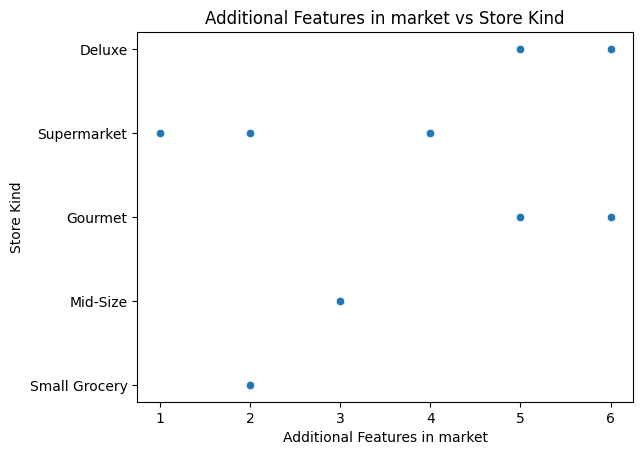

In [31]:
# Scatter plot using Seaborn
sns.scatterplot(x='Additional Features in market', y='Store Kind', data=df)
# plt.figure(figsize=(10, 6))
plt.xlabel('Additional Features in market')
plt.ylabel('Store Kind')
plt.title('Additional Features in market vs Store Kind')
plt.show()

In [32]:
df['Additional Features in market'].isnull().sum()

4291

In [33]:
# correlationC=[]
# for column in df.columns :
#        print( df[column].corr(df['Additional Features in market']))
#         # if a > 0.8 and (column != 'Additional Features in market') :
#         #     if a in correlationC:
#         #         continue
#         #     else :
#        print (column +" column has high correlation with column "+ 'Additional Features in market')
#        print(df[column].corr(df['Additional Features in market']))
#        print("*******************************")

In [34]:
# def fillNULL_AdditionalFeaturesinmarket():


#### store Kind

<Axes: title={'center': 'Level Column Values'}, ylabel='Store Kind'>

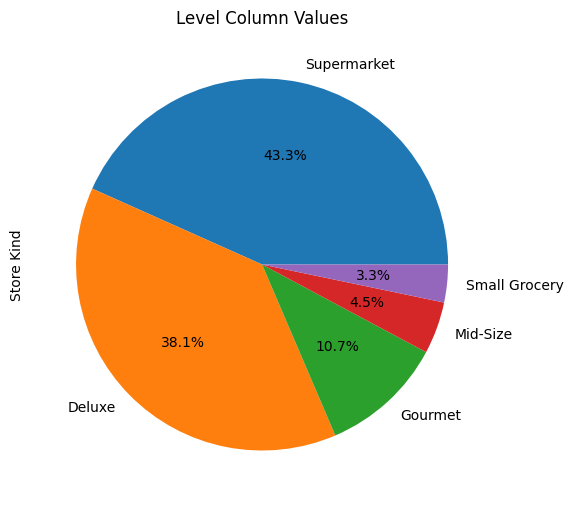

In [35]:
plt.figure(figsize=(6,7))
plt.title("Level Column Values")
round(df["Store Kind"].value_counts()/df.shape[0]*100,2).plot.pie(autopct= '%2.1f%%')

In [36]:
df["Store Kind"].value_counts()

Supermarket      14296
Deluxe           12585
Gourmet           3549
Mid-Size          1495
Small Grocery     1082
Name: Store Kind, dtype: int64

In [37]:
labels = {
    1: "Small Grocery",
    2: "Mid-Size",
    3: "Supermarket",
    4: "Gourmet",
    5: "Deluxe",
}

In [38]:
# Decode ((Additional Features in market))
df["Store Kind"] = df["Store Kind"].replace([labels[3],labels[5],labels[4],labels[2],labels[1]],[3,5,4,2,1])
df["Store Kind"].value_counts()

3.0    14296
5.0    12585
4.0     3549
2.0     1495
1.0     1082
Name: Store Kind, dtype: int64

#### Promotion Name

In [39]:
df.head()

,marital state,gender,Number Of Childrens,education,working status,Place Code,Customer Order,department,Ordered Brand,Additional Features in market,...,Net Weight,Package Weight,Is Recyclable?,Min. Yearly Income,Frozen Area,Meat Area,Cost,Store Area,Grocery Area,ID
0,Single,F,4,bachelors degree,professional,H11go_ZA,Cleaning Supplies,Household,Red Wing,6,...,26.6008,1.5990,1.0,10000.0,481.98,323.00,602.7575,2842.23,2037.64,1
1,Single,F,3,bachelors degree,management,S04ne_WA,Snack Foods,Snack Foods,Nationeel,NaN,...,14.9720,1.5990,0.0,50000.0,457.36,NaN,708.6650,2814.95,2049.72,2
2,Married,M,2,high school degree,skilled manual,L05es_CA,Magazines,Periodicals,Excel,1,...,27.1822,1.4536,1.0,30000.0,523.32,348.85,564.2647,2192.32,1322.21,3
3,Single,F,3,partial college,professional,S03le_WA,Dairy,Dairy,Carlson,2,...,11.2944,2.9217,1.0,30000.0,440.92,293.95,724.5119,1974.73,NaN,4
4,Married,F,5,bachelors degree,professional,M10da_YU,Vegetables,Produce,Hermanos,6,...,9.7100,2.9072,0.0,50000.0,593.93,395.95,519.7574,2862.30,1872.19,5


In [40]:
df["Promotion Name"].value_counts()

Save Price                  1287
Weekend Discount            1277
Two Day Sale                1258
Price Winners               1155
Super Savers                1085
Save It (Sale)              1074
Super Duper Savers          1065
One Day Sale                1010
Roller Savings (High)        990
Sale : Double Down           969
GLD                          966
Price Slashers               938
Shelf Clearing Days          907
Full Free                    892
Lottery Cash Registerion     827
Go For It                    812
Two for One                  801
Money Savers                 789
Big Time Discounts           770
Price Destroyers             737
Budget Bargains              719
Saving Days                  719
Discount Frenzy              667
Best Price Savers            649
Dimes Off                    635
Promo Big                    607
You Save Days                605
Savings Galore               596
Sales Days                   586
Price Cutters                586
Bag Stuffe

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Promotion Name"] = le.fit_transform(df["Promotion Name"])


In [42]:
df["Promotion Name"].value_counts().count()

50

In [43]:
df["Promotion Name"].value_counts()

49    5824
34    1287
47    1277
44    1258
26    1155
40    1085
33    1074
39    1065
20    1010
28     990
29     969
13     966
24     938
37     907
12     892
17     827
14     812
45     801
18     789
3      770
23     737
35     719
5      719
8      667
1      649
7      635
27     607
48     605
36     596
32     586
22     586
0      574
42     545
16     530
31     506
30     496
43     494
21     466
38     453
2      451
4      408
46     329
9      298
19     282
25     252
15     246
6      210
41     201
10     139
11     132
Name: Promotion Name, dtype: int64

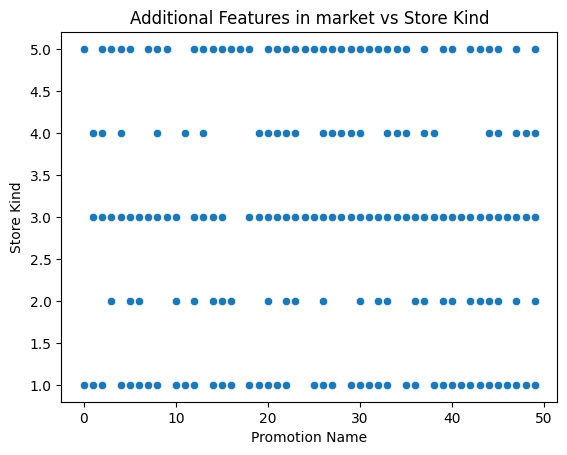

In [44]:
# Scatter plot using Seaborn
sns.scatterplot(x='Promotion Name', y='Store Kind', data=df)
# plt.figure(figsize=(10, 6))
plt.xlabel('Promotion Name')
plt.ylabel('Store Kind')
plt.title('Additional Features in market vs Store Kind')
plt.show()

#### Is Recyclable?

In [43]:
df["Is Recyclable?"] = df["Is Recyclable?"].replace(["recyclable","non recyclable"],[1,0])
df["Is Recyclable?"].value_counts()

1.0    10842
0.0     8590
Name: Is Recyclable?, dtype: int64

[Text(0.5, 1.0, 'Is Recyclable?')]

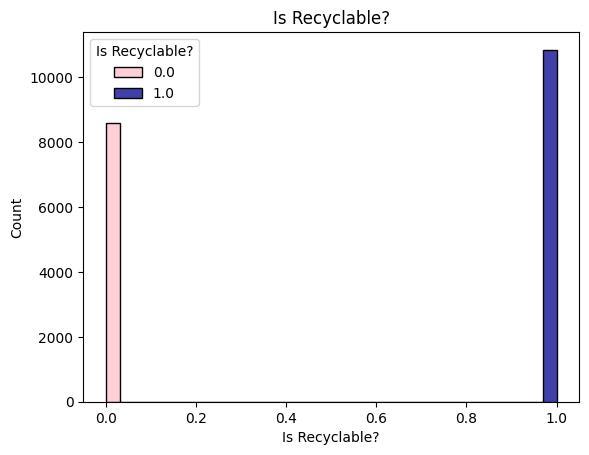

In [44]:
# plt.subplots(figsize=(8, 4))
sns.histplot(data=df, x=df["Is Recyclable?"], hue=df["Is Recyclable?"], multiple="dodge",palette=["pink","darkblue"]).set(title='Is Recyclable?')

#### Place Code

In [45]:
df['Place Code'].value_counts()

T02ma_WA    3655
S01em_OR    3532
P07nd_OR    3280
S03le_WA    3241
H11go_ZA    3028
M10da_YU    2923
S04ne_WA    2875
B06ls_CA    2690
L05es_CA    2584
B14on_WA    2197
V13er_BC    2173
O09ba_VE    1659
C15ho_ZA    1495
A17co_GU     998
M12ty_DF     879
S18co_CA     496
B08am_WA     472
V19ia_BC     355
G16ra_JA     282
Name: Place Code, dtype: int64

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Place Code'] = le.fit_transform(df['Place Code'])

In [47]:
df['Place Code'].value_counts()

16    3655
12    3532
11    3280
13    3241
6     3028
8     2923
14    2875
1     2690
7     2584
3     2197
17    2173
10    1659
4     1495
0      998
9      879
15     496
2      472
18     355
5      282
Name: Place Code, dtype: int64

#### Store Area


In [48]:
df["Grocery Area"].isnull().sum()

3605

In [49]:
# def fillGroceryArea():
#Grocery Area (Convert all nan to 0 )
for i in range(df.shape[0]):
    item = df.loc[i,"Grocery Area"]
    # print(type(item))
    if str(item) == 'nan' :
      df.loc[i,"Grocery Area"] = 0

      #df.loc[i,"Grocery Area"]  = float(df["Store Area"][i]) - float(df["Frozen Area"][i]) + float(df["Meat Area"][i])
      # print("Store Area ",item)

# fillGroceryArea()

In [50]:
df["Grocery Area"].isnull().sum()

0

In [51]:
print ("Any null values Here ? ",(df['Grocery Area']==0).sum())

Any null values Here ?  3605


In [52]:
df["Frozen Area"][2]
df["Frozen Area"].isnull().sum()

3546

In [53]:
#Frozen Area (Convert all nan to 0 )
for i in range(df.shape[0]):
  # if len (df.loc[i,'Additional Features in market']) == 5 :
    item = df.loc[i,"Frozen Area"]
    #rename nan to 0
    # print(type(item))
    # print(item)
    if str(item) == 'nan' :
      df.loc[i,"Frozen Area"] = 0

    # print("Frozen Area",item)
    # print('----------------------------------------')
      # df.loc[i,'Additional Features in market'] = "['Video S

In [54]:
df["Frozen Area"].isnull().sum()

0

In [55]:
print ("Any null values Here ? ",(df['Frozen Area']==0).sum())

Any null values Here ?  3546


In [56]:
df["Meat Area"][2]
df["Meat Area"].isnull().sum()

3546

In [57]:
for i in range(df.shape[0]):
    item = df.loc[i,"Meat Area"]
    if str(item) == 'nan' :
       df.loc[i,"Meat Area"] = 0


In [58]:
df["Meat Area"].isnull().sum()

0

In [59]:
print ("Any null values Here ? ",(df['Meat Area']==0).sum())

Any null values Here ?  3546


In [60]:
#####################
df['Store Area'][2]

2192.32

In [61]:
#########################
df['Store Area'].isnull().sum()

3563

In [62]:
############################
type(df['Grocery Area'][i])


numpy.float64

In [63]:
############################
df['Grocery Area'][2]

1322.21

In [64]:
############################
if df['Grocery Area'][2] == 1322.21:
        print(True)


True


In [65]:
#convert all (nan) to  [0]
for i in range(df.shape[0]):
    item = df.loc[i,"Store Area"]
    print(type(item))
    if str(item) == 'nan' :
      df.loc[i,"Store Area"] = 0
      print(item)
      print('---------------------------------')

Streaming output truncated to the last 5000 lines.
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
nan
---------------------------------
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>

In [66]:
print ("Any null values Here ? ",(df['Store Area']==0).sum())

Any null values Here ?  3563


In [67]:
df['Store Area'].isnull().sum()

0

In [68]:
# def fillStoreArea():
for i in range(df.shape[0]):
    item = df.loc[i,'Store Area']
    print(type(item))
    print(item)
    print('+++++++++++++++++++++++++++++++++++++++++++')
    # if type(item) == float :
    if item == 0:
      a = float(df['Grocery Area'][i])
      b = float(df['Frozen Area'][i])
      c = float(df['Meat Area'][i])
      # check if GroceryArea	+ FrozenArea + MeatArea Are nulls
      if df["Grocery Area"][i] != np.float64(0)  and  df["Frozen Area"][i] != np.float64(0) and  df["Meat Area"][i] != np.float64(0) :
          #Store Area = GroceryArea	+ FrozenArea + MeatArea
          df.loc[i,'Store Area']  = float(df["Grocery Area"][i]) + float(df["Frozen Area"][i]) + float(df["Meat Area"][i])
          print('Store Area'  ,df.loc[i,'Store Area'] ,' Grocery Area',df["Grocery Area"][i],' Frozen Area' ,df["Frozen Area"][i],' Meat Area'   ,df["Meat Area"][i])

      print ("Any null values Here ? ",df['Store Area'].isnull().sum())

# fillStoreArea()


Streaming output truncated to the last 5000 lines.
1887.7
+++++++++++++++++++++++++++++++++++++++++++
<class 'numpy.float64'>
3147.23
+++++++++++++++++++++++++++++++++++++++++++
<class 'numpy.float64'>
1966.89
+++++++++++++++++++++++++++++++++++++++++++
<class 'numpy.float64'>
1887.62
+++++++++++++++++++++++++++++++++++++++++++
<class 'numpy.float64'>
2188.74
+++++++++++++++++++++++++++++++++++++++++++
<class 'numpy.float64'>
2200.69
+++++++++++++++++++++++++++++++++++++++++++
<class 'numpy.float64'>
1970.94
+++++++++++++++++++++++++++++++++++++++++++
<class 'numpy.float64'>
3145.51
+++++++++++++++++++++++++++++++++++++++++++
<class 'numpy.float64'>
2572.86
+++++++++++++++++++++++++++++++++++++++++++
<class 'numpy.float64'>
3687.88
+++++++++++++++++++++++++++++++++++++++++++
<class 'numpy.float64'>
2150.39
+++++++++++++++++++++++++++++++++++++++++++
<class 'numpy.float64'>
3145.51
+++++++++++++++++++++++++++++++++++++++++++
<class 'numpy.float64'>
2568.98
++++++++++++++++++++++++++++++

In [69]:
#before Preprocessing
print ("Any null values Here ? ",(df['Store Area']==0).sum())

Any null values Here ?  923


In [70]:
#After Preprocessing
print ("Any null values Here ? ",(df['Store Area']==0).sum())

Any null values Here ?  923


In [71]:
print ("Any null values Here ? ",df['Store Area'].isnull().sum())


Any null values Here ?  0


#### Grocery Area

In [72]:
print ("Any null values Here = ",df['Grocery Area'].isnull().sum())


Any null values Here =  0


In [73]:
print ("Any null values Here ? ",(df['Grocery Area']==0).sum())

Any null values Here ?  3605


In [74]:
for i in range(df.shape[0]):
    string= df['Grocery Area'].iloc[i]
    if string == 0:
      # check if StoreArea	- FrozenArea + MeatArea Are nulls
       if df["Store Area"][i] != 0  and  df["Frozen Area"][i] != 0 and  df["Meat Area"][i] != 0 :
          #GroceryArea  = store Area	+ Frozen Area + Meat Area
          df.loc[i,'Grocery Area']  = float(df["Store Area"][i]) - ( float(df["Frozen Area"][i]) + float(df["Meat Area"][i]))
          print('Grocery Area'  ,df.loc[i,'Grocery Area'] ,' Store Area',df["Store Area"][i],'- Frozen Area' ,df["Frozen Area"][i],' Meat Area'   ,df["Meat Area"][i])



Grocery Area 1239.8600000000001  Store Area 1974.73 - Frozen Area 440.92  Meat Area 293.95
Grocery Area 1235.73  Store Area 1970.6 - Frozen Area 440.92  Meat Area 293.95
Grocery Area 1876.4900000000002  Store Area 2866.09 - Frozen Area 593.93  Meat Area 395.67
Grocery Area 2444.58  Store Area 3228.4 - Frozen Area 470.27  Meat Area 313.55
Grocery Area 2049.18  Store Area 2811.99 - Frozen Area 457.36  Meat Area 305.45
Grocery Area 1509.0  Store Area 1890.04 - Frozen Area 227.8  Meat Area 153.24
Grocery Area 1424.85  Store Area 2200.69 - Frozen Area 465.54  Meat Area 310.3
Grocery Area 1505.77  Store Area 1885.47 - Frozen Area 227.8  Meat Area 151.9
Grocery Area 1236.0700000000002  Store Area 1970.94 - Frozen Area 440.92  Meat Area 293.95
Grocery Area 2820.8100000000004  Store Area 3565.8 - Frozen Area 447.7  Meat Area 297.29
Grocery Area 1233.52  Store Area 1968.7 - Frozen Area 440.92  Meat Area 294.26
Grocery Area 2050.2699999999995  Store Area 2811.99 - Frozen Area 457.36  Meat Area 30

In [75]:
print ("Any null values Here ? ",(df['Grocery Area']==0).sum())


Any null values Here ?  937


#### Frozen Area

In [76]:
print ("Any null values Here = ",df['Frozen Area'].isnull().sum())

Any null values Here =  0


In [77]:
print ("Any null values Here ? ",(df['Frozen Area']==0).sum())

Any null values Here ?  3546


In [78]:
for i in range(df.shape[0]):
    string= df['Frozen Area'].iloc[i]
    if string == 0:
      # check if Store Area	- [Grocery Area + Meat Area]  Are nulls
       if df["Store Area"][i] != 0  and  df["Grocery Area"][i] != 0 and  df["Meat Area"][i] != 0 :
          #Frozen Area  = store Area	- [Grocery Area + Meat Area]
          df.loc[i,'Frozen Area']  = float(df["Store Area"][i]) - (( float(df["Grocery Area"][i]) + float(df["Meat Area"][i])))
          print('Frozen Area'  ,df.loc[i,'Frozen Area'] ,'= Store Area',df["Store Area"][i],'- Grocery Area' ,df["Grocery Area"][i],'+ Meat Area'   ,df["Meat Area"][i])



Frozen Area 594.02 = Store Area 2861.51 - Grocery Area 1871.16 + Meat Area 396.33
Frozen Area 594.1300000000001 = Store Area 2860.46 - Grocery Area 1871.16 + Meat Area 395.17
Frozen Area 389.8499999999999 = Store Area 3200.91 - Grocery Area 2551.4 + Meat Area 259.66
Frozen Area 652.1399999999999 = Store Area 3144.65 - Grocery Area 2055.29 + Meat Area 437.22
Frozen Area 346.69000000000005 = Store Area 2195.63 - Grocery Area 1623.48 + Meat Area 225.46
Frozen Area 536.3699999999999 = Store Area 2283.7 - Grocery Area 1393.1 + Meat Area 354.23
Frozen Area 229.17000000000007 = Store Area 1887.06 - Grocery Area 1507.54 + Meat Area 150.35
Frozen Area 455.4800000000005 = Store Area 2810.11 - Grocery Area 2049.72 + Meat Area 304.91
Frozen Area 502.98 = Store Area 2572.86 - Grocery Area 1734.5 + Meat Area 335.38
Frozen Area 385.4500000000003 = Store Area 2207.28 - Grocery Area 1564.86 + Meat Area 256.97
Frozen Area 440.1200000000001 = Store Area 1970.94 - Grocery Area 1236.07 + Meat Area 294.75
F

In [79]:
print ("Any null values Here ? ",(df['Frozen Area']==0).sum())


Any null values Here ?  948


#### Meat Area

In [80]:
print ("Any null values Here = ",df['Meat Area'].isnull().sum())

Any null values Here =  0


In [81]:
print ("Any null values Here ? ",(df['Meat Area']==0).sum())

Any null values Here ?  3546


In [82]:
for i in range(df.shape[0]):
    string= df['Meat Area'].iloc[i]
    if string == 0:
      # check if Store Area	- [Grocery Area + Frozen Area]  Are nulls
       if df["Store Area"][i] != 0  and  df["Grocery Area"][i] != 0 and  df["Frozen Area"][i] != 0 :
          #Meat Area  = store Area	- [Grocery Area + Frozen Area]
          df.loc[i,'Meat Area']  = float(df["Store Area"][i]) - (( float(df["Grocery Area"][i]) + float(df["Frozen Area"][i])))
          print('Meat Area'  ,df.loc[i,'Meat Area'] ,'= Store Area',df["Store Area"][i],'- Grocery Area' ,df["Grocery Area"][i],'+ Frozen Area'   ,df["Frozen Area"][i])



Meat Area 307.8699999999999 = Store Area 2814.95 - Grocery Area 2049.72 + Frozen Area 457.36
Meat Area 151.33000000000015 = Store Area 1887.13 - Grocery Area 1508.0 + Frozen Area 227.8
Meat Area 311.3900000000003 = Store Area 2201.78 - Grocery Area 1424.85 + Frozen Area 465.54
Meat Area 289.53999999999996 = Store Area 1966.53 - Grocery Area 1236.07 + Frozen Area 440.92
Meat Area 310.4200000000001 = Store Area 2200.81 - Grocery Area 1424.85 + Frozen Area 465.54
Meat Area 340.2399999999998 = Store Area 2577.81 - Grocery Area 1734.5 + Frozen Area 503.07
Meat Area 434.23 = Store Area 3143.65 - Grocery Area 2055.29 + Frozen Area 654.13
Meat Area 306.71000000000004 = Store Area 2197.1 - Grocery Area 1424.85 + Frozen Area 465.54
Meat Area 253.55999999999995 = Store Area 3196.5 - Grocery Area 2551.4 + Frozen Area 391.54
Meat Area -5748.57 = Store Area 2811.99 - Grocery Area 8103.2 + Frozen Area 457.36
Meat Area 310.3000000000002 = Store Area 2200.69 - Grocery Area 1424.85 + Frozen Area 465.54


In [83]:
print ("Any null values Here ? ",(df['Meat Area']==0).sum())


Any null values Here ?  909


finally I found maxium nulls at meat area = 909

#### Store Cost Vs Sales Cost

In [84]:
df['Store Cost'].value_counts()

1.5120    34
2.3520    33
1.3680    31
1.5840    29
3.0240    29
          ..
5.5632     1
4.0596     1
5.5848     1
0.8636     1
0.9417     1
Name: Store Cost, Length: 7929, dtype: int64

In [85]:
df.isnull().sum()

marital state                        0
gender                               0
Number Of Childrens                  0
education                            0
working status                       0
Place Code                           0
Customer Order                       0
department                           0
Ordered Brand                        0
Additional Features in market     4291
Promotion Name                       0
Store Kind                        5807
Store Sales                      12960
Store Cost                       12954
Gross Weight                      1942
Net Weight                        1935
Package Weight                    3575
Is Recyclable?                   19408
Min. Yearly Income                   0
Frozen Area                          0
Meat Area                            0
Cost                                 0
Store Area                           0
Grocery Area                         0
ID                                   0
dtype: int64

In [86]:
df.shape

(38814, 25)

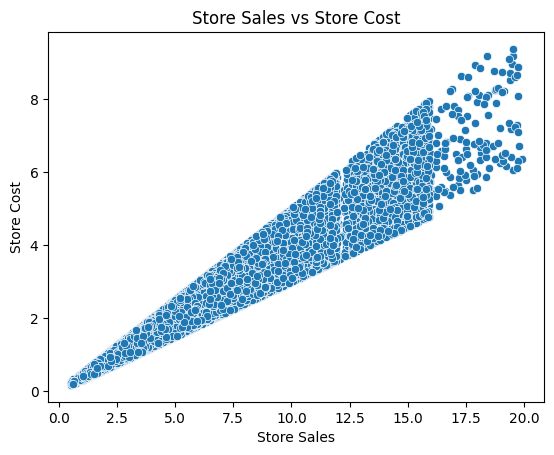

In [87]:
# Scatter plot using Seaborn
sns.scatterplot(x='Store Sales', y='Store Cost', data=df)
# plt.figure(figsize=(10, 6))
plt.xlabel('Store Sales')
plt.ylabel('Store Cost')
plt.title('Store Sales vs Store Cost')
plt.show()

In [88]:
df.keys()

Index(['marital state', 'gender', 'Number Of Childrens', 'education',
       'working status', 'Place Code', 'Customer Order', 'department',
       'Ordered Brand', 'Additional Features in market', 'Promotion Name',
       'Store Kind', 'Store Sales', 'Store Cost', 'Gross Weight', 'Net Weight',
       'Package Weight', 'Is Recyclable?', 'Min. Yearly Income', 'Frozen Area',
       'Meat Area', 'Cost', 'Store Area', 'Grocery Area', 'ID'],
      dtype='object')

### Gross Weight

In [92]:
df["Gross Weight"].isnull().sum()

1942

In [104]:
# # def fillGroceryArea():
# #Grocery Area (Convert all nan to 0 )
# # for i in range(df.shape[0]):
# #     item = df.loc[i,'Gross Weight']
# #     print(type(item))
# #     print(item)
# #     print('**********************************')
#     # if str(item) == 'nan' :
#     #   df.loc[i,"Grocery Area"] = 0

#       #df.loc[i,"Grocery Area"]  = float(df["Store Area"][i]) - float(df["Frozen Area"][i]) + float(df["Meat Area"][i])
#       # print("Store Area ",item)

# # fillGroceryArea()

# # Iterate over all rows in the 'Column_Name' column
# # for index, row in df.iterrows():
# #     column_value = row['Gross Weight']
# #     print(type(item))
# #     print(item)
# #     print('**********************************')

# for i in range (df.shape[0]):
#      item = df['Gross Weight'][i]
#      print(type(item))
#      print(item)
#      print('**********************************')


In [105]:
#Frozen Area (Convert all nan to 0 )
for i in range(df.shape[0]):
  # if len (df.loc[i,'Additional Features in market']) == 5 :
    item = df.loc[i,"Gross Weight"]
    #rename nan to 0
    # print(type(item))
    # print(item)
    if str(item) == 'nan' :
      df.loc[i,"Gross Weight"] = 0

    # print("Frozen Area",item)
    # print('----------------------------------------')
      # df.loc[i,'Additional Features in market'] = "['Video S

KeyError: ignored

In [ ]:
for i in range(df.shape[0]):
    item = df.loc[i,"Meat Area"]
    if str(item) == 'nan' :
       df.loc[i,"Meat Area"] = 0

In [ ]:
# def fillStoreArea():
for i in range(df.shape[0]):
    item = df.loc[i,'Store Area']
    print(type(item))
    print(item)
    print('+++++++++++++++++++++++++++++++++++++++++++')
    # if type(item) == float :
    if item == 0:
      a = float(df['Grocery Area'][i])
      b = float(df['Frozen Area'][i])
      c = float(df['Meat Area'][i])
      # check if GroceryArea	+ FrozenArea + MeatArea Are nulls
      if df["Grocery Area"][i] != np.float64(0)  and  df["Frozen Area"][i] != np.float64(0) and  df["Meat Area"][i] != np.float64(0) :
          #Store Area = GroceryArea	+ FrozenArea + MeatArea
          df.loc[i,'Store Area']  = float(df["Grocery Area"][i]) + float(df["Frozen Area"][i]) + float(df["Meat Area"][i])
          print('Store Area'  ,df.loc[i,'Store Area'] ,' Grocery Area',df["Grocery Area"][i],' Frozen Area' ,df["Frozen Area"][i],' Meat Area'   ,df["Meat Area"][i])

      print ("Any null values Here ? ",df['Store Area'].isnull().sum())

# fillStoreArea()


### Package Weight

In [106]:
df["Package Weight"].isnull().sum()

3577

In [110]:
df.shape[0]

38821

In [ ]:
#Package Weight (Convert all nan to 0 )
for i in range(38821):
    item = df.loc[i,'Package Weight']
    print(type(item))
    print(item)

    if str(item) == 'nan' :
      df.loc[i,"Package Weight"] = 0



Streaming output truncated to the last 5000 lines.
<class 'numpy.float64'>
2.9217
<class 'numpy.float64'>
nan
<class 'numpy.float64'>
2.9072
<class 'numpy.float64'>
nan
<class 'numpy.float64'>
2.9071
<class 'numpy.float64'>
nan
<class 'numpy.float64'>
1.5989
<class 'numpy.float64'>
1.4536
<class 'numpy.float64'>
nan
<class 'numpy.float64'>
nan
<class 'numpy.float64'>
nan
<class 'numpy.float64'>
2.9072
<class 'numpy.float64'>
3.0525
<class 'numpy.float64'>
4.3608
<class 'numpy.float64'>
4.3608
<class 'numpy.float64'>
1.4536
<class 'numpy.float64'>
4.3608
<class 'numpy.float64'>
2.9217
<class 'numpy.float64'>
3.0525
<class 'numpy.float64'>
nan
<class 'numpy.float64'>
1.5989
<class 'numpy.float64'>
nan
<class 'numpy.float64'>
2.9072
<class 'numpy.float64'>
1.4536
<class 'numpy.float64'>
4.3608
<class 'numpy.float64'>
2.9072
<class 'numpy.float64'>
1.4536
<class 'numpy.float64'>
2.9072
<class 'numpy.float64'>
2.9072
<class 'numpy.float64'>
nan
<class 'numpy.float64'>
4.3608
<class 'numpy.f

In [ ]:
df["Grocery Area"].isnull().sum()

In [ ]:
print ("Any null values Here ? ",(df['Grocery Area']==0).sum())

In [ ]:
# def fillStoreArea():
for i in range(df.shape[0]):
    item = df.loc[i,'Store Area']
    print(type(item))
    print(item)
    print('+++++++++++++++++++++++++++++++++++++++++++')
    # if type(item) == float :
    if item == 0:
      a = float(df['Grocery Area'][i])
      b = float(df['Frozen Area'][i])
      c = float(df['Meat Area'][i])
      # check if GroceryArea	+ FrozenArea + MeatArea Are nulls
      if df["Grocery Area"][i] != np.float64(0)  and  df["Frozen Area"][i] != np.float64(0) and  df["Meat Area"][i] != np.float64(0) :
          #Store Area = GroceryArea	+ FrozenArea + MeatArea
          df.loc[i,'Store Area']  = float(df["Grocery Area"][i]) + float(df["Frozen Area"][i]) + float(df["Meat Area"][i])
          print('Store Area'  ,df.loc[i,'Store Area'] ,' Grocery Area',df["Grocery Area"][i],' Frozen Area' ,df["Frozen Area"][i],' Meat Area'   ,df["Meat Area"][i])

      print ("Any null values Here ? ",df['Store Area'].isnull().sum())

# fillStoreArea()


In [123]:
row_index = 101

if row_index in df.index:
    print(df.loc[row_index])
else:
    print(f"Row with index {row_index} does not exist.")


Row with index 101 does not exist.


In [128]:
df['Frozen Area'][101]

373.1

### Net Weight

### marital state

In [88]:
df['marital state'].value_counts()

Single     19599
Married    19215
Name: marital state, dtype: int64

In [89]:
df["marital state"] = df["marital state"].replace(["Single","Married"],[1,0])
df["marital state"].value_counts()

1    19599
0    19215
Name: marital state, dtype: int64

### gender




In [90]:
df['gender'].value_counts()

F    19872
M    18942
Name: gender, dtype: int64

In [91]:
df["gender"] = df["gender"].replace(["F","M"],[0,1])
df["gender"].value_counts()

0    19872
1    18942
Name: gender, dtype: int64

### Education

In [94]:
df['education'].value_counts()


1    11668
2    11430
4    10296
3     3415
5     2005
Name: education, dtype: int64

In [95]:
df["education"] = df["education"].replace(["partial high school","high school degree","partial college","graduate degree","bachelors degree"],[1,2,3,5,4])
df["education"].value_counts()

1    11668
2    11430
4    10296
3     3415
5     2005
Name: education, dtype: int64

### working status

In [96]:
df.keys()

Index(['marital state', 'gender', 'Number Of Childrens', 'education',
       'working status', 'Place Code', 'Customer Order', 'department',
       'Ordered Brand', 'Additional Features in market', 'Promotion Name',
       'Store Kind', 'Store Sales', 'Store Cost', 'Gross Weight', 'Net Weight',
       'Package Weight', 'Is Recyclable?', 'Min. Yearly Income', 'Frozen Area',
       'Meat Area', 'Cost', 'Store Area', 'Grocery Area', 'ID'],
      dtype='object')

In [97]:
df['working status'].value_counts()


professional      12861
skilled manual    10211
manual             9438
management         5606
clerical            698
Name: working status, dtype: int64

In [98]:
df["working status"] = df["working status"].replace(["manual","skilled manual","clerical","professional","management"],[1,2,3,4,5])
df["working status"].value_counts()

4    12861
2    10211
1     9438
5     5606
3      698
Name: working status, dtype: int64

### Customer Order

In [ ]:
df['Customer Order'].value_counts()


In [137]:
df['Customer Order'].value_counts().count()

45

In [129]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Customer Order'] = le.fit_transform(df['Customer Order'])


### Department

In [99]:
df['department'].value_counts()

Produce                5568
Snack Foods            4465
Household              4019
Frozen Foods           3921
Baking Goods           2875
Canned Foods           2720
Dairy                  2429
Health and Hygiene     2409
Beverages              1914
Deli                   1805
Baked Goods            1141
Alcoholic Beverages    1016
Snacks                 1007
Starchy Foods           681
Eggs                    615
Periodicals             610
Breakfast Foods         492
Canned Products         260
Checkout                246
Seafood                 241
Meat                    240
Carousel                140
Name: department, dtype: int64

In [100]:
df['department'].value_counts().count()

22

In [101]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["department"] = le.fit_transform(df["department"])


In [102]:
df['department'].value_counts()


17    5568
19    4465
14    4019
12    3921
2     2875
5     2720
9     2429
13    2409
3     1914
10    1805
1     1141
0     1016
20    1007
21     681
11     615
16     610
4      492
6      260
8      246
18     241
15     240
7      140
Name: department, dtype: int64

### Ordered Brand

In [145]:
df['Ordered Brand'].value_counts().count()

111

In [146]:
df['Ordered Brand'].value_counts()


Hermanos     1210
Ebony        1157
Tell Tale    1114
Tri-State    1049
High Top     1041
             ... 
Prelude        31
Symphony       30
ADJ            30
Toretti        28
King           21
Name: Ordered Brand, Length: 111, dtype: int64

In [131]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Ordered Brand'] = le.fit_transform(df['Ordered Brand'])


In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot a heatmap to visualize the correlation
plt.figure(figsize=(24, 24))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Feature1 and Feature2')
plt.show()


### Outliers

In [104]:
df.isnull().sum()

marital state                        0
gender                               0
Number Of Childrens                  0
education                            0
working status                       0
Place Code                           0
Customer Order                       0
department                           0
Ordered Brand                        0
Additional Features in market     4291
Promotion Name                       0
Store Kind                        5807
Store Sales                      12960
Store Cost                       12954
Gross Weight                      1942
Net Weight                        1935
Package Weight                    3575
Is Recyclable?                   19408
Min. Yearly Income                   0
Frozen Area                          0
Meat Area                            0
Cost                                 0
Store Area                           0
Grocery Area                         0
ID                                   0
dtype: int64

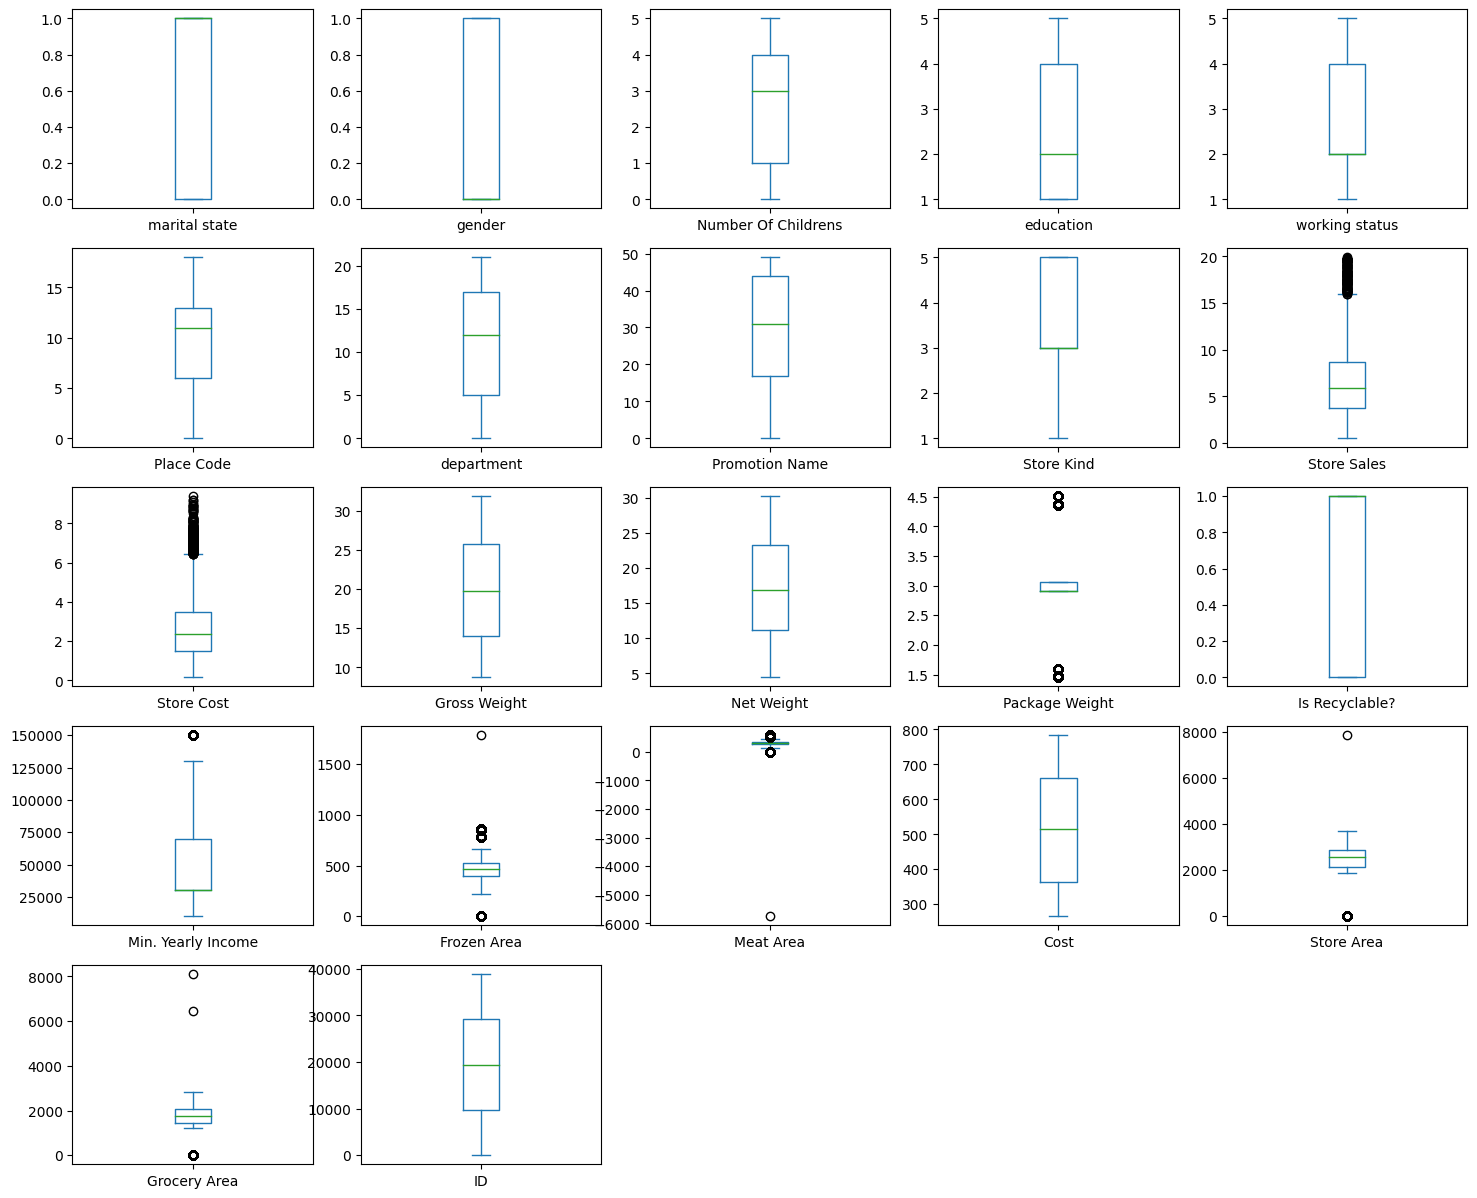

In [105]:
# drawing a box plots for all columns

df.plot(kind='box', subplots=True, layout=(5,5), figsize=(18,15))
plt.show()

In [112]:
columns=['Store Sales', 'Store Cost','Min. Yearly Income','Package Weight','Frozen Area','Meat Area','Frozen Area','Store Area']
for column in columns:
  # Calculate IQR and define a multiplier (adjust as needed)
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  multiplier = 1.5

  # Set upper limit
  upper_limit = Q3 + multiplier * IQR

  # Replace values exceeding the upper limit with the upper limit
  df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])

  print(df)


       marital state  gender  Number Of Childrens  education  working status  \
0                  1       0                    4          4               4   
1                  1       0                    3          4               5   
2                  0       1                    2          2               2   
3                  1       0                    3          3               4   
4                  0       0                    5          4               4   
...              ...     ...                  ...        ...             ...   
38809              1       0                    4          2               1   
38810              1       1                    1          4               5   
38811              0       1                    0          1               4   
38812              1       0                    1          2               2   
38813              1       1                    2          1               1   

       Place Code        Customer Order

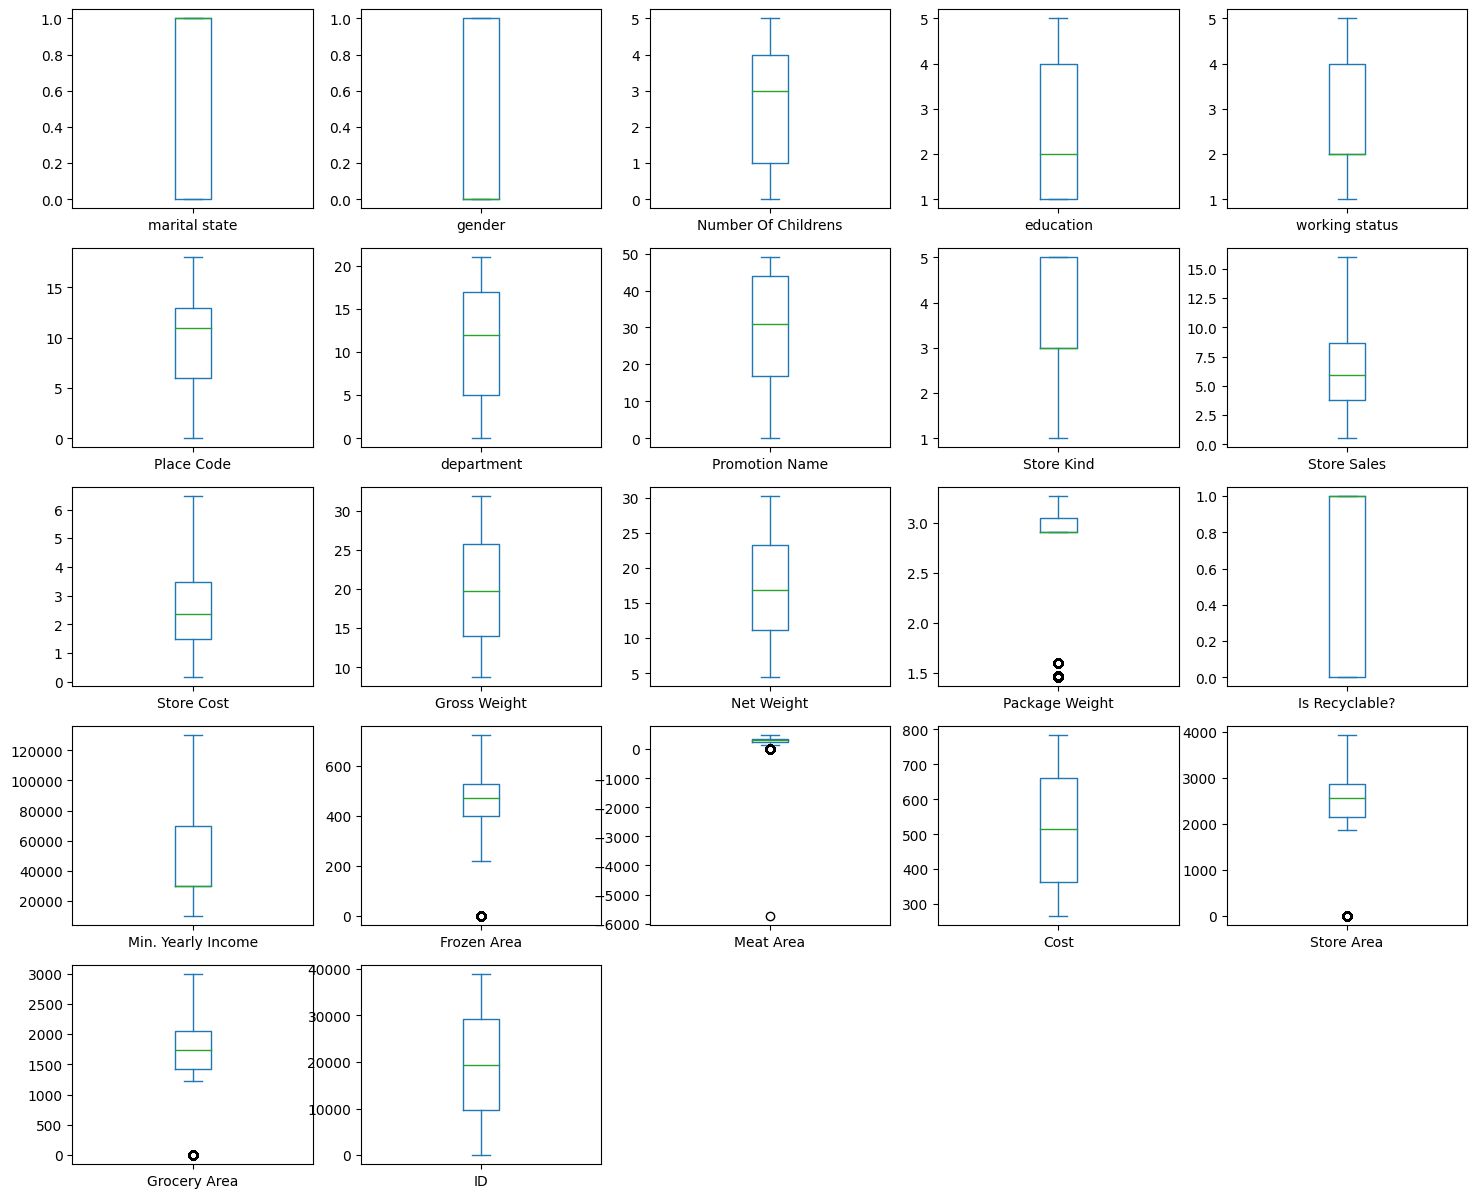

In [113]:
# drawing a box plots for all columns

df.plot(kind='box', subplots=True, layout=(5,5), figsize=(18,15))
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Create box plots for numerical columns
df.boxplot(column=['Store Sales', 'Store Cost','Min. Yearly Income','Package Weight','Grocery Area', 'Meat Area','Frozen Area','Store Area'])
plt.show()


In [ ]:
df.keys()

In [114]:
#Transforming Data:

df['Package Weight'] = np.log1p(df['Package Weight'])
df['Grocery Area'] = np.log1p(df['Grocery Area'])
df['Meat Area'] = np.log1p(df['Meat Area'])
df['Frozen Area'] = np.log1p(df['Frozen Area'])
df['Store Area'] = np.log1p(df['Store Area'])



/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


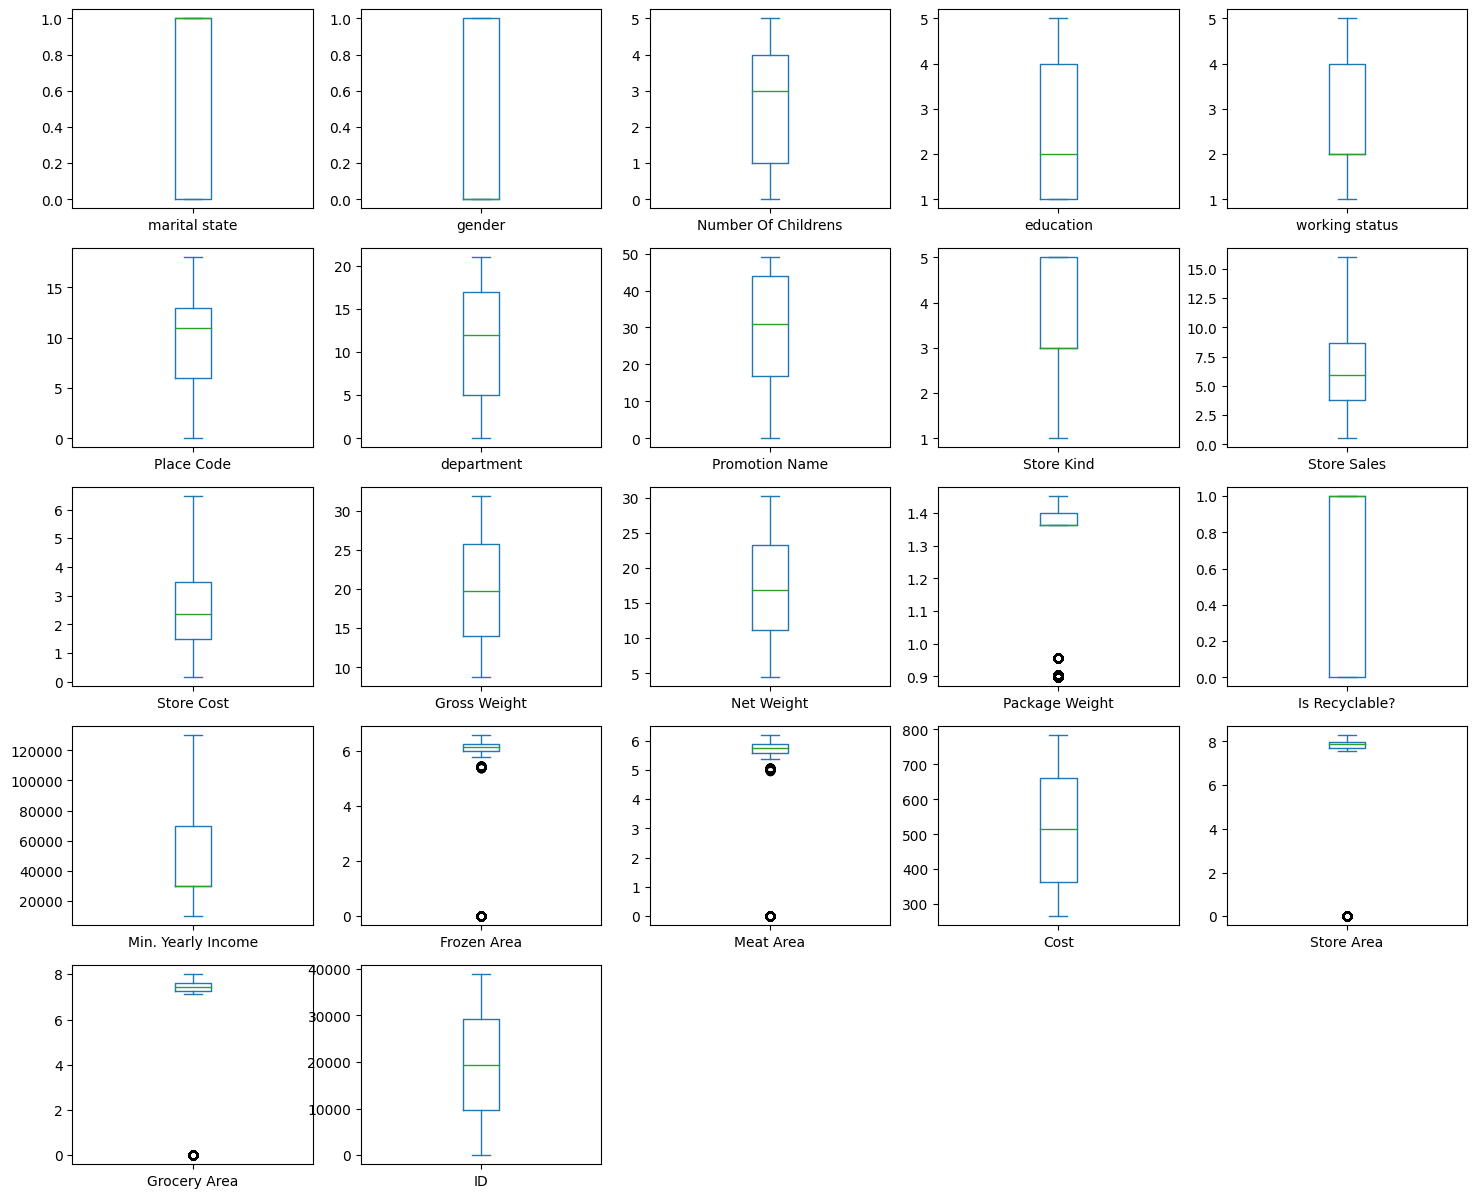

In [115]:
# drawing a box plots for all columns

df.plot(kind='box', subplots=True, layout=(5,5), figsize=(18,15))
plt.show()

In [117]:
outliers.count()

marital state                    0
gender                           0
Number Of Childrens              0
education                        0
working status                   0
Place Code                       0
Customer Order                   0
department                       0
Ordered Brand                    0
Additional Features in market    0
Promotion Name                   0
Store Kind                       0
Store Sales                      0
Store Cost                       0
Gross Weight                     0
Net Weight                       0
Package Weight                   0
Is Recyclable?                   0
Min. Yearly Income               0
Frozen Area                      0
Meat Area                        0
Cost                             0
Store Area                       0
Grocery Area                     0
ID                               0
dtype: int64

In [119]:
df.shape

(38814, 25)

####Habd

In [116]:
outliers.count()

marital state                    0
gender                           0
Number Of Childrens              0
education                        0
working status                   0
Place Code                       0
Customer Order                   0
department                       0
Ordered Brand                    0
Additional Features in market    0
Promotion Name                   0
Store Kind                       0
Store Sales                      0
Store Cost                       0
Gross Weight                     0
Net Weight                       0
Package Weight                   0
Is Recyclable?                   0
Min. Yearly Income               0
Frozen Area                      0
Meat Area                        0
Cost                             0
Store Area                       0
Grocery Area                     0
ID                               0
dtype: int64

In [106]:
from scipy import stats

z_scores = stats.zscore(df['Min. Yearly Income'])
threshold = 3  # Adjust as needed
outliers = df[(z_scores > threshold) | (z_scores < -threshold)]


In [161]:
#set lower and upper bounds
Q1 = df['Min. Yearly Income'].quantile(0.25)
Q3 = df['Min. Yearly Income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Min. Yearly Income'] < lower_bound) | (df['Min. Yearly Income'] > upper_bound)]


In [ ]:
import seaborn as sns

# Create a scatter plot
sns.scatterplot(x='Min. Yearly Income', y='education', data=df)
plt.show()


In [ ]:
df.keys()

In [ ]:
import matplotlib.pyplot as plt

# Create box plots for numerical columns
df.boxplot(column=['Store Sales', 'Store Cost','Min. Yearly Income',])
plt.show()


In [118]:
# # Create box plots for numerical columns
# df.boxplot(column=['Grocery Area', 'Meat Area','Frozen Area','Store Area'])
# plt.show()

# Feature Engineering

> Scaling

> Feature Polynomial

> PCA




In [172]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler to your data and transform it
X_scaled = scaler.fit_transform(X)

# X_scaled now contains your scaled data


scaler

Normalization

In [ ]:
plt.subplots(figsize = (8, 8))
sns.heatmap(df.corr(), annot = True)

# Modeling

In [ ]:
x =
y =

In [ ]:
from sklearn.model_selection import train_test_split

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

In [ ]:
x_train, x_test = train_test_split(df,test_size=0.2,random_state=42)


In [ ]:
# Initialize the class
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train_scaled, y_train )

In [ ]:
# Results summarizer function (scores, confusion matrix) for classification results
def resultsSummarizer(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')


    plt.figure(figsize=(7, 6))

    sns.heatmap(cm,
                annot=True,
                cmap='Blues',
                xticklabels=labels.values(),
                yticklabels=labels.values()
               )

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Activity')
    plt.ylabel('Actual Activity')
    plt.show()

    print(f'Accuracy Score: ' + '{:.4%}'.format(acc))
    print(f'Precision Score: ' + '{:.4%}'.format(prec))
    print(f'Recall Score: ' + '{:.4%}'.format(rec))
    print(f'F_1 Score: ' + '{:.4%}'.format(f1))

In [121]:
# Feed the scaled training set and get the predictions
yhat = linear_model.predict(X_train_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"training MSE (using sklearn function): {mean_squared_error(y_train, yhat) / 2}")

# for-loop implementation
total_squared_error = 0

for i in range(len(yhat)):
    squared_error_i  = (yhat[i] - y_train[i])**2
    total_squared_error += squared_error_i

mse = total_squared_error / (2*len(yhat))

print(f"training MSE (for-loop implementation): {mse.squeeze()}")

In [155]:
# Scale the cross validation set using the mean and standard deviation of the training set
X_cv_scaled = scaler_linear.transform(x_cv)

print(f"Mean used to scale the CV set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Standard deviation used to scale the CV set: {scaler_linear.scale_.squeeze():.2f}")

# Feed the scaled cross validation set
yhat = linear_model.predict(X_cv_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

In [ ]:
# Instantiate the class to make polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)

# Compute the number of features and transform the training set
X_train_mapped = poly.fit_transform(x_train)

# Preview the first 5 elements of the new training set. Left column is `x` and right column is `x^2`
# Note: The `e+<number>` in the output denotes how many places the decimal point should
# be moved. For example, `3.24e+03` is equal to `3240`
print(X_train_mapped[:5])

In [ ]:
# Instantiate the class
scaler_poly = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)

# Preview the first 5 elements of the scaled training set.
print(X_train_mapped_scaled[:5])

In [ ]:
# Initialize the class
model = LinearRegression()

# Train the model
model.fit(X_train_mapped_scaled, y_train )

# Compute the training MSE
yhat = model.predict(X_train_mapped_scaled)
print(f"Training MSE: {mean_squared_error(y_train, yhat) / 2}")

# Add the polynomial features to the cross validation set
X_cv_mapped = poly.transform(x_cv)

# Scale the cross validation set using the mean and standard deviation of the training set
X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

# Compute the cross validation MSE
yhat = model.predict(X_cv_mapped_scaled)
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

In [ ]:
# Initialize lists containing the lists, models, and scalers
train_mses = []
cv_mses = []
models = []
scalers = []

# Loop over 10 times. Each adding one more degree of polynomial higher than the last.
for degree in range(1,11):

    # Add polynomial features to the training set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_mapped = poly.fit_transform(x_train)

    # Scale the training set
    scaler_poly = StandardScaler()
    X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    scalers.append(scaler_poly)

    # Create and train the model
    model = LinearRegression()
    model.fit(X_train_mapped_scaled, y_train )
    models.append(model)

    # Compute the training MSE
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    train_mses.append(train_mse)

    # Add polynomial features and scale the cross validation set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_cv_mapped = poly.fit_transform(x_cv)
    X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

    # Compute the cross validation MSE
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    cv_mses.append(cv_mse)

# Plot the results
degrees=range(1,11)
utils.plot_train_cv_mses(degrees, train_mses, cv_mses, title="degree of polynomial vs. train and CV MSEs")

In [ ]:
# Get the model with the lowest CV MSE (add 1 because list indices start at 0)
# This also corresponds to the degree of the polynomial added
degree = np.argmin(cv_mses) + 1
print(f"Lowest CV MSE is found in the model with degree={degree}")

In [ ]:
# Add polynomial features to the test set
poly = PolynomialFeatures(degree, include_bias=False)
X_test_mapped = poly.fit_transform(x_test)

# Scale the test set
X_test_mapped_scaled = scalers[degree-1].transform(X_test_mapped)

# Compute the test MSE
yhat = models[degree-1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Training MSE: {train_mses[degree-1]:.2f}")
print(f"Cross Validation MSE: {cv_mses[degree-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

### Linear Regression Model

#### Try Chatgpt model quickly

In [146]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Define your features (X) and target variable (y)
X = df.drop('Cost', axis=1)
y = df['Cost']

# Step 1: Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Polynomial Features
poly = PolynomialFeatures(degree=2)  # Adjust the degree as needed
X_poly = poly.fit_transform(X_scaled)

# Step 3: PCA
pca = PCA(n_components=2)  # Adjust the explained variance threshold
X_pca = pca.fit_transform(X_poly)

# Step 4: Regularization (Ridge Regression)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=0.4)  # Adjust alpha for regularization strength
ridge.fit(X_train, y_train)

# Make predictions
y_pred = ridge.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 156.42756751236178


In [126]:
# # Apply K-Means clustering
# kmeans1 = KMeans(n_clusters=5,n_init = 10 ,max_iter=300)
# kmeans1.fit(df)
# y_kmeans = kmeans1.predict(df)

# # Plot the data and cluster centers
# plt.scatter(df['Gender'],df['Age'], c=y_kmeans, cmap='viridis', s=50)
# centers = kmeans1.cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, alpha=0.75)
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('K-Means Clustering')
# plt.show()

# # Plot the data and cluster centers
# plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'], c=y_kmeans, cmap='viridis', s=50)
# centers = kmeans1.cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, alpha=0.75)
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('K-Means Clustering')
# plt.show()



In [127]:
# df

### XGboost

#### Try Chatgpt model quickly

In [137]:
df_copy = df[:]
df = df.dropna(subset=['Additional Features in market','Store Kind','Store Sales','Store Cost','Gross Weight','Net Weight','Net Weight','Package Weight','Is Recyclable?','Meat Area'])

In [138]:
df.isnull().sum()

marital state                    0
gender                           0
Number Of Childrens              0
education                        0
working status                   0
Place Code                       0
Customer Order                   0
department                       0
Ordered Brand                    0
Additional Features in market    0
Promotion Name                   0
Store Kind                       0
Store Sales                      0
Store Cost                       0
Gross Weight                     0
Net Weight                       0
Package Weight                   0
Is Recyclable?                   0
Min. Yearly Income               0
Frozen Area                      0
Meat Area                        0
Cost                             0
Store Area                       0
Grocery Area                     0
ID                               0
dtype: int64

In [139]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Define your features (X) and target variable (y)
X = df.drop('Cost', axis=1)
y = df['Cost']

# Step 1: Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Polynomial Features
poly = PolynomialFeatures(degree=2)  # Adjust the degree as needed
X_poly = poly.fit_transform(X_scaled)

# Step 3: PCA
pca = PCA(n_components=0.95)  # Adjust the explained variance threshold
X_pca = pca.fit_transform(X_poly)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Step 4: XGBoost Regression
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)  # Use squarederror for regression
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 163.3608484944085


### **Habd text**

In [ ]:
df.head()

,ID,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Product Weights Data in (KG),Is Recyclable?,Min. Person Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Female with four children, education: b...",H11go_ZA,"Cleaning Supplies from Household department, O...","[Video Store, Ready Food, Florist, Coffee Bar,...",Dimes Off,Deluxe,8.76 Millions,4.2924 Millions,"{'Gross Weight': 28.1997, 'Net Weight': 26.600...",recyclable,10K+,2842.23,2037.64,481.98,323,602.7575
1,mc_ID_1,"Single Female with three children, education: ...",S04ne_WA,"Snack Foods from Snack Foods department, Order...",NaN,Budget Bargains,Supermarket,6.36 Millions,1.9716 Millions,"{'Gross Weight': 16.571, 'Net Weight': 14.972,...",non recyclable,50K+,2814.95,2049.72,457.36,NaN,708.6650
2,mc_ID_2,"Married Male with two children, education: hig...",L05es_CA,"Magazines from Periodicals department, Ordered...",['Florist'],Shelf Emptiers,Supermarket,10.86 Millions,4.4526 Millions,"{'Gross Weight': 28.6358, 'Net Weight': 27.182...",recyclable,30K+,2192.32,1322.21,523.32,348.85,564.2647
3,mc_ID_3,"Single Female with three children, education: ...",S03le_WA,"Dairy from Dairy department, Ordered Brand : C...",['Coffee Bar'],Savings Galore,NaN,1.98 Millions,0.6732 Millions,"{'Gross Weight': 14.2161, 'Net Weight': 11.294...",recyclable,30K+,1974.73,NaN,440.92,293.95,724.5119
4,mc_ID_4,"Married Female with five children, education: ...",M10da_YU,"Vegetables from Produce department, Ordered Br...","[Video Store, Ready Food, Florist, Coffee Bar,...",Sale Winners,Deluxe,11.56 Millions,4.9708 Millions,"{'Gross Weight': 12.6172, 'Net Weight': 9.71, ...",non recyclable,50K+,2862.3,1872.19,593.93,395.95,519.7574


0        False
1        False
2        False
3        False
4        False
         ...  
19435     True
19436     True
19437     True
19438     True
19439     True
Length: 19440, dtype: bool

--> *no dublicates Found*


In [ ]:
df= df.drop ('CustomerID',axis=1)

In [ ]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [ ]:
X_scaled

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [ ]:
df.describe()

,Frozen Area,Cost
count,17506.000000,19416.000000
mean,492.810453,519.620778
std,145.874844,157.423741
min,227.800000,265.631700
25%,440.920000,364.269500
50%,470.270000,516.776300
75%,534.290000,662.222600
max,855.220000,783.192500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19440 entries, 0 to 19439
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     19440 non-null  object 
 1   Person Description             19440 non-null  object 
 2   Place Code                     19440 non-null  object 
 3   Customer Order                 19440 non-null  object 
 4   Additional Features in market  15140 non-null  object 
 5   Promotion Name                 16530 non-null  object 
 6   Store Kind                     16530 non-null  object 
 7   Store Sales                    19440 non-null  object 
 8   Store Cost                     19440 non-null  object 
 9   Product Weights Data in (KG)   19440 non-null  object 
 10  Is Recyclable?                 19440 non-null  object 
 11  Min. Yearly Income             19437 non-null  object 
 12  Store Area                     17483 non-null 

In [ ]:
df.keys()

Index(['Unnamed: 0', 'Person Description', 'Place Code', 'Customer Order',
       'Additional Features in market', 'Promotion Name', 'Store Kind',
       'Store Sales', 'Store Cost', 'Product Weights Data in (KG)',
       'Is Recyclable?', 'Min. Yearly Income', 'Store Area', 'Grocery Area',
       'Frozen Area', 'Meat Area', 'Cost'],
      dtype='object')

In [ ]:
df1.keys()

Index(['Unnamed: 0', 'Person Description', 'Place Code', 'Customer Order',
       'Additional Features in market', 'Promotion Name', 'Store Kind',
       'Store Sales', 'Store Cost', 'Gross Weight', 'Net Weight',
       'Is Recyclable?', 'Min. Person Yearly Income', 'Store Area',
       'Grocery Area', 'Frozen Area', 'Meat Area', 'Cost'],
      dtype='object')

In [ ]:
list3 = df2.keys()
list3 = list3.to_list()
list1 = df.keys().to_list()
print(list1)
print(list2)
print(list3)

['ID', 'Person Description', 'Place Code', 'Customer Order', 'Additional Features in market', 'Promotion Name', 'Store Kind', 'Store Sales', 'Store Cost', 'Product Weights Data in (KG)', 'Is Recyclable?', 'Min. Person Yearly Income', 'Store Area', 'Grocery Area', 'Frozen Area', 'Meat Area', 'Cost']
['ID', 'Person Description', 'Place Code', 'Customer Order', 'Additional Features in market', 'Promotion Name', 'Store Kind', 'Store Sales', 'Store Cost', 'Gross Weight', 'Net Weight', 'Is Recyclable?', 'Min. Person Yearly Income', 'Store Area', 'Grocery Area', 'Frozen Area', 'Meat Area', 'Cost']
['ID', 'Person Description', 'Place Code', 'Customer Order', 'Additional Features in market', 'Promotion Name', 'Store Kind', 'Store Sales', 'Store Cost', 'Gross Weight', 'Net Weight', 'Weights%20Data', 'Is Recyclable?', 'Min. Person Yearly Income', 'Store Area', 'Grocery Area', 'Frozen Area', 'Meat Area', 'Cost']


In [ ]:
df1.head()

,ID,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Is Recyclable?,Min. Person Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Male with two children, education: high...",S01em_OR,"Baking Goods from Baking Goods department, Ord...","['Video Store', 'Florist', 'Ready Food', 'Bar ...",Tip Top Savings,Deluxe,3.28 M,0.984 M,21.9493,19.0421,yes,30K+,2577.50,1734.50,503.07,335.38,287.1270
1,mc_ID_1,"Married Male with four children, education: hi...",T02ma_WA,"Canned Sardines from Canned Foods department, ...","['Florist', 'Bar For Salad', 'Ready Food', 'Co...",Discount Frenzy,Deluxe,9.35 M,4.2075 M,19.1874,16.1349,yes,30K+,3145.51,2057.74,654.13,NaN,779.6884
2,mc_ID_2,"Married Female with three children, education:...",S04ne_WA,"Frozen Desserts from Frozen Foods department, ...",[],Tip Top Savings,Supermarket,8.4 M,3.192 M,16.7163,12.3555,no,30K+,2811.99,2049.72,457.36,304.91,557.8318
3,mc_ID_3,"Single Male with four children, education: par...",V13er_BC,"Frozen Desserts from Frozen Foods department, ...","['Coffee Bar', 'Ready Food', 'Bar For Salad', ...",Price Cutters,NaN,4.6 M,1.518 M,24.1296,NaN,yes,10K+,2147.17,NaN,373.1,248.79,642.0871
4,mc_ID_4,"Married Female with four children, education: ...",B14on_WA,"Meat from Deli department, Ordered Brand : Moms","['Ready Food', 'Bar For Salad']",Money Savers,Supermarket,6.81 M,3.2007 M,17.8792,16.4256,no,50K+,3685.30,2265.90,853.22,568.75,432.0503


In [ ]:
# Rename column headers
new_columns = {'Unnamed: 0': 'ID', 'Min. Yearly Income': 'Min. Person Yearly Income'}

#  new_columns = {'Unnamed: 0': 'ID','Person%20Description': 'Person Description', 'Min. Yearly Income': 'Min. Person Yearly Income', 'Place Code':'Place Code', 'Customer Order':'Customer Order',
#         'Additional Features in market':'Additional Features in market', 'Promotion Name':'Promotion Name', 'Store Kind':'Store Kind',
#         'Store Sales':'Store Sales', 'Store Cost':'Store Cost', 'Product Weights Data in (KG)':'Product Weights Data in (KG)',
#         'Is Recyclable?':'Is Recyclable?', 'Min. Yearly Income', 'Store Area', 'Grocery Area',
#        'Frozen Area', 'Meat Area', 'Cost'}

df.rename(columns=new_columns, inplace=True)
df.keys()

Index(['ID', 'Person Description', 'Place Code', 'Customer Order',
       'Additional Features in market', 'Promotion Name', 'Store Kind',
       'Store Sales', 'Store Cost', 'Product Weights Data in (KG)',
       'Is Recyclable?', 'Min. Person Yearly Income', 'Store Area',
       'Grocery Area', 'Frozen Area', 'Meat Area', 'Cost'],
      dtype='object')

In [ ]:
# Rename column headers
new_columns = {'Unnamed: 0': 'ID', 'Min. Yearly Income': 'Min. Person Yearly Income'}

#  new_columns = {'Unnamed: 0': 'ID','Person%20Description': 'Person Description', 'Min. Yearly Income': 'Min. Person Yearly Income', 'Place Code':'Place Code', 'Customer Order':'Customer Order',
#         'Additional Features in market':'Additional Features in market', 'Promotion Name':'Promotion Name', 'Store Kind':'Store Kind',
#         'Store Sales':'Store Sales', 'Store Cost':'Store Cost', 'Product Weights Data in (KG)':'Product Weights Data in (KG)',
#         'Is Recyclable?':'Is Recyclable?', 'Min. Yearly Income', 'Store Area', 'Grocery Area',
#        'Frozen Area', 'Meat Area', 'Cost'}

df1.rename(columns=new_columns, inplace=True)
df1.keys()

list2=df1.keys().to_list()

In [ ]:
new_columns_df2 = {'Unnamed: 0' : 'ID', 'Person%20Description' : 'Person Description', 'Place%20Code':'Place Code',
       'Customer%20Order':'Customer Order', 'Additional%20Features%20in%20market':'Additional Features in market',
       'Promotion%20Name':'Promotion Name', 'Store%20Kind':'Store Kind', 'Store%20Sales':'Store Sales', 'Store%20Cost':'Store Cost',
       'Gross%20Weight':'Gross Weight', 'Net%20Weight':'Net Weight', 'Is%20Recyclable?':'Is Recyclable?',
       'Yearly%20Income':'Min. Person Yearly Income', 'Store%20Area':'Store Area', 'Grocery%20Area':'Grocery Area', 'Frozen%20Area':'Frozen Area',
       'Meat%20Area':'Meat Area', 'Cost':'Cost'}
df2.rename(columns=new_columns_df2, inplace=True)
df2.keys()

# #df1
#        'Unnamed: 0', 'Person Description', 'Place Code', 'Customer Order',
#        'Additional Features in market', 'Promotion Name', 'Store Kind',
#        'Store Sales', 'Store Cost', 'Gross Weight', 'Net Weight',
#        'Is Recyclable?', 'Min. Person Yearly Income', 'Store Area',
#        'Grocery Area', 'Frozen Area', 'Meat Area', 'Cost'

Index(['ID', 'Person Description', 'Place Code', 'Customer Order',
       'Additional Features in market', 'Promotion Name', 'Store Kind',
       'Store Sales', 'Store Cost', 'Gross Weight', 'Net Weight',
       'Weights%20Data', 'Is Recyclable?', 'Min. Person Yearly Income',
       'Store Area', 'Grocery Area', 'Frozen Area', 'Meat Area', 'Cost'],
      dtype='object')

In [ ]:
common_columns = list(set(df.columns) & set(df1.columns) & set(df2.columns))
batch1_common = df[common_columns]
batch2_common = df1[common_columns]
batch3_common = df2[common_columns]
concatenated_df = pd.concat([batch1_common, batch2_common, batch3_common], ignore_index=True)


In [ ]:
common_key = 'ID'  # Replace with the actual key column name
merged_df = df.merge(df1, on=common_key, how='outer').merge(df2, on=common_key, how='outer')


In [ ]:
df2['Weights%20Data'][0]

"{'Gross Weight': 23.2575, 'Net Weight': 20.3503, 'Package Weight': 2.9072}"

In [ ]:
new_value = ['Video Store', 'Ready Food', 'Florist', 'Coffee Bar', 'Bar For Salad']
my_array = np.array(new_value)

for i in range(df.shape[0]):
  if df['Store Kind'][i] == 'Deluxe' :
    df['Additional Features in market'][i] = ['Florist', 'Bar For Salad', 'Ready Food', 'Video Store', 'Coffee Bar']
    str(df['Additional Features in market'][i])

df['Additional Features in market'].value_counts()


<ipython-input-122-cf0da11bb305>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Additional Features in market'][i] = ['Florist', 'Bar For Salad', 'Ready Food', 'Video Store', 'Coffee Bar']


[Florist, Bar For Salad, Ready Food, Video Store, Coffee Bar]              6220
['Coffee Bar']                                                             2230
['Florist']                                                                1322
['Ready Food', 'Bar For Salad']                                            1037
['Bar For Salad', 'Ready Food']                                             933
                                                                           ... 
['Florist', 'Bar For Salad', 'Ready Food', 'Video Store', 'Coffee Bar']      10
['Ready Food', 'Florist', 'Video Store', 'Bar For Salad', 'Coffee Bar']      10
['Bar For Salad', 'Florist', 'Ready Food', 'Video Store', 'Coffee Bar']      10
['Bar For Salad', 'Coffee Bar', 'Video Store', 'Ready Food', 'Florist']       9
['Bar For Salad', 'Video Store', 'Florist', 'Coffee Bar', 'Ready Food']       9
Name: Additional Features in market, Length: 151, dtype: int64

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

df1 = pd.read_csv('/content/Train_Batch_2.csv',sep=",",encoding="UTF-8")

df1.head()


,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Is Recyclable?,Min. Person Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Male with two children, education: high...",S01em_OR,"Baking Goods from Baking Goods department, Ord...","['Video Store', 'Florist', 'Ready Food', 'Bar ...",Tip Top Savings,Deluxe,3.28 M,0.984 M,21.9493,19.0421,yes,30K+,2577.50,1734.50,503.07,335.38,287.1270
1,mc_ID_1,"Married Male with four children, education: hi...",T02ma_WA,"Canned Sardines from Canned Foods department, ...","['Florist', 'Bar For Salad', 'Ready Food', 'Co...",Discount Frenzy,Deluxe,9.35 M,4.2075 M,19.1874,16.1349,yes,30K+,3145.51,2057.74,654.13,NaN,779.6884
2,mc_ID_2,"Married Female with three children, education:...",S04ne_WA,"Frozen Desserts from Frozen Foods department, ...",[],Tip Top Savings,Supermarket,8.4 M,3.192 M,16.7163,12.3555,no,30K+,2811.99,2049.72,457.36,304.91,557.8318
3,mc_ID_3,"Single Male with four children, education: par...",V13er_BC,"Frozen Desserts from Frozen Foods department, ...","['Coffee Bar', 'Ready Food', 'Bar For Salad', ...",Price Cutters,NaN,4.6 M,1.518 M,24.1296,NaN,yes,10K+,2147.17,NaN,373.1,248.79,642.0871
4,mc_ID_4,"Married Female with four children, education: ...",B14on_WA,"Meat from Deli department, Ordered Brand : Moms","['Ready Food', 'Bar For Salad']",Money Savers,Supermarket,6.81 M,3.2007 M,17.8792,16.4256,no,50K+,3685.30,2265.90,853.22,568.75,432.0503


In [ ]:
df1.describe()

,Gross Weight,Net Weight,Store Area,Grocery Area,Meat Area,Cost
count,11014.000000,11018.000000,11663.000000,11658.000000,11688.000000,12953.000000
mean,20.032870,17.149701,2598.170053,1773.400262,329.709677,518.565349
std,6.700986,6.804349,524.954453,365.488893,96.819335,155.198098
min,8.721600,4.433500,1882.710000,1233.080000,149.900000,265.631700
25%,14.045325,11.207200,2189.080000,1506.990000,293.577500,364.269500
50%,19.768900,16.861700,2572.860000,1734.500000,313.550000,515.259600
75%,25.728600,23.257500,2864.085000,2052.540000,394.272500,660.235200
max,31.833700,30.234700,3692.840000,2822.650000,570.740000,783.192500


In [ ]:
df.head(2)

,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Product Weights Data in (KG),Is Recyclable?,Min. Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Female with four children, education: b...",H11go_ZA,"Cleaning Supplies from Household department, O...","['Video Store', 'Florist', 'Ready Food', 'Coff...",Dimes Off,Deluxe,8.76 Millions,4.2924 Millions,"{'Gross Weight': 28.1997, 'Net Weight': 26.600...",recyclable,10K+,2842.23,2037.64,481.98,323,602.7575
1,mc_ID_1,"Single Female with three children, education: ...",S04ne_WA,"Snack Foods from Snack Foods department, Order...",NaN,Budget Bargains,Supermarket,6.36 Millions,1.9716 Millions,"{'Gross Weight': 16.571, 'Net Weight': 14.972,...",non recyclable,50K+,2814.95,2049.72,457.36,NaN,708.6650


In [ ]:
df['Person Description'][2]

'Married Male with two children, education: high school degree working as skilled manual'

In [ ]:
df['Promotion Name'][2]

'Shelf Emptiers'

In [ ]:
df2.describe()

,Gross%20Weight,Net%20Weight,Store%20Area,Grocery%20Area,Frozen%20Area,Meat%20Area,Cost
count,5491.000000,5511.000000,6151.000000,6138.000000,6147.000000,6133.000000,6462.000000
mean,20.153632,17.152036,2602.487761,1779.720722,493.928194,328.839786,519.355948
std,6.683436,6.744036,532.761319,367.559597,147.995833,97.616394,158.578508
min,8.721600,4.491600,1882.710000,1233.240000,227.800000,149.900000,265.631700
25%,14.223400,11.294400,2190.910000,1508.000000,440.920000,293.120000,364.164900
50%,19.914200,16.861700,2572.860000,1734.500000,470.270000,313.550000,516.776300
75%,26.019300,22.966800,2863.465000,2052.550000,534.290000,356.190000,662.222600
max,31.833700,30.234700,7857.550000,2822.610000,1783.640000,570.730000,783.192500


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

df2 = pd.read_csv('/content/Train_Batch_3.csv',sep=",",encoding="UTF-8")

df2.head()


,Unnamed: 0,Person%20Description,Place%20Code,Customer%20Order,Additional%20Features%20in%20market,Promotion%20Name,Store%20Kind,Store%20Sales,Store%20Cost,Gross%20Weight,Net%20Weight,Weights%20Data,Is%20Recyclable?,Yearly%20Income,Store%20Area,Grocery%20Area,Frozen%20Area,Meat%20Area,Cost
0,mc_ID_0,"Single Female with two children, education: pa...",T02ma_WA,"Meat from Deli department, Ordered Brand : Red...","['Coffee Bar', 'Florist', 'Ready Food', 'Bar F...",Sale : Double Down,Deluxe,7.12 Millions,2.5632 Millions,23.2575,20.3503,"{'Gross Weight': 23.2575, 'Net Weight': 20.350...",yes,90K+,3145.51,2056.79,654.13,436.09,500.7202
1,mc_ID_1,"Single Female with five children, education: p...",M10da_YU,"Specialty from Produce department, Ordered Bra...","['Coffee Bar', 'Florist', 'Bar For Salad', 'Vi...",GLD,Deluxe,14.72 Millions,7.0656 Millions,16.7163,12.3555,"{'Gross Weight': 16.7163, 'Net Weight': 12.355...",yes,30K+,2856.68,1871.16,595.93,395.51,484.1411
2,mc_ID_2,"Married Male with three children, education: h...",T02ma_WA,"Paper Products from Household department, Orde...","['Coffee Bar', 'Bar For Salad', 'Ready Food', ...",Promo Big,Deluxe,4.98 Millions,2.4402 Millions,10.5531,7.6459,"{'Gross Weight': 10.5531, 'Net Weight': 7.6459...",no,30K+,3140.99,2055.29,654.13,436.09,267.3576
3,mc_ID_3,"Married Female with five children, education: ...",H11go_ZA,"Snack Foods from Snack Foods department, Order...","['Video Store', 'Coffee Bar', 'Ready Food', 'F...",Price Destroyers,NaN,5.24 Millions,2.0436 Millions,23.6936,NaN,"{'Gross Weight': 23.6936, 'Net Weight': 20.641...",no,10K+,2841.35,2038.11,481.98,322.22,777.2826
4,mc_ID_4,"Married Female with No children, education: pa...",O09ba_VE,"Canned Soup from Canned Foods department, Orde...","['Ready Food', 'Bar For Salad']",Save Price,Supermarket,8.84 Millions,3.4476 Millions,13.6056,10.6839,"{'Gross Weight': 13.6056, 'Net Weight': 10.683...",no,110K+,3236.33,2448.37,472.27,313.87,406.4756


In [ ]:
df2['Additional%20Features%20in%20market'][0]

"['Coffee Bar', 'Florist', 'Ready Food', 'Bar For Salad']"

In [ ]:
df1['Additional Features in market'][0]

"['Video Store', 'Florist', 'Ready Food', 'Bar For Salad', 'Coffee Bar']"

In [ ]:
df1.head()

,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Is Recyclable?,Min. Person Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Male with two children, education: high...",S01em_OR,"Baking Goods from Baking Goods department, Ord...","['Video Store', 'Florist', 'Ready Food', 'Bar ...",Tip Top Savings,Deluxe,3.28 M,0.984 M,21.9493,19.0421,yes,30K+,2577.50,1734.50,503.07,335.38,287.1270
1,mc_ID_1,"Married Male with four children, education: hi...",T02ma_WA,"Canned Sardines from Canned Foods department, ...","['Florist', 'Bar For Salad', 'Ready Food', 'Co...",Discount Frenzy,Deluxe,9.35 M,4.2075 M,19.1874,16.1349,yes,30K+,3145.51,2057.74,654.13,NaN,779.6884
2,mc_ID_2,"Married Female with three children, education:...",S04ne_WA,"Frozen Desserts from Frozen Foods department, ...",[],Tip Top Savings,Supermarket,8.4 M,3.192 M,16.7163,12.3555,no,30K+,2811.99,2049.72,457.36,304.91,557.8318
3,mc_ID_3,"Single Male with four children, education: par...",V13er_BC,"Frozen Desserts from Frozen Foods department, ...","['Coffee Bar', 'Ready Food', 'Bar For Salad', ...",Price Cutters,NaN,4.6 M,1.518 M,24.1296,NaN,yes,10K+,2147.17,NaN,373.1,248.79,642.0871
4,mc_ID_4,"Married Female with four children, education: ...",B14on_WA,"Meat from Deli department, Ordered Brand : Moms","['Ready Food', 'Bar For Salad']",Money Savers,Supermarket,6.81 M,3.2007 M,17.8792,16.4256,no,50K+,3685.30,2265.90,853.22,568.75,432.0503


In [ ]:
import pandas as pd

# Concatenate the DataFrames vertically (along rows)
concatenated_df = pd.concat([df1, df2, df], ignore_index=True)

# Save the concatenated DataFrame to a new CSV file
concatenated_df.to_csv('/content/concatenated.csv', index=False)



In [ ]:
concatenated_df.head()

,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,...,Net%20Weight,Weights%20Data,Is%20Recyclable?,Yearly%20Income,Store%20Area,Grocery%20Area,Frozen%20Area,Meat%20Area,Product Weights Data in (KG),Min. Yearly Income
0,mc_ID_0,"Single Male with two children, education: high...",S01em_OR,"Baking Goods from Baking Goods department, Ord...","['Video Store', 'Florist', 'Ready Food', 'Bar ...",Tip Top Savings,Deluxe,3.28 M,0.984 M,21.9493,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mc_ID_1,"Married Male with four children, education: hi...",T02ma_WA,"Canned Sardines from Canned Foods department, ...","['Florist', 'Bar For Salad', 'Ready Food', 'Co...",Discount Frenzy,Deluxe,9.35 M,4.2075 M,19.1874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,mc_ID_2,"Married Female with three children, education:...",S04ne_WA,"Frozen Desserts from Frozen Foods department, ...",[],Tip Top Savings,Supermarket,8.4 M,3.192 M,16.7163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mc_ID_3,"Single Male with four children, education: par...",V13er_BC,"Frozen Desserts from Frozen Foods department, ...","['Coffee Bar', 'Ready Food', 'Bar For Salad', ...",Price Cutters,NaN,4.6 M,1.518 M,24.1296,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mc_ID_4,"Married Female with four children, education: ...",B14on_WA,"Meat from Deli department, Ordered Brand : Moms","['Ready Food', 'Bar For Salad']",Money Savers,Supermarket,6.81 M,3.2007 M,17.8792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.head(10)


,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Product Weights Data in (KG),Is Recyclable?,Min. Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Female with four children, education: b...",H11go_ZA,"Cleaning Supplies from Household department, O...","['Video Store', 'Florist', 'Ready Food', 'Coff...",Dimes Off,Deluxe,8.76 Millions,4.2924 Millions,"{'Gross Weight': 28.1997, 'Net Weight': 26.600...",recyclable,10K+,2842.23,2037.64,481.98,323,602.7575
1,mc_ID_1,"Single Female with three children, education: ...",S04ne_WA,"Snack Foods from Snack Foods department, Order...",NaN,Budget Bargains,Supermarket,6.36 Millions,1.9716 Millions,"{'Gross Weight': 16.571, 'Net Weight': 14.972,...",non recyclable,50K+,2814.95,2049.72,457.36,NaN,708.6650
2,mc_ID_2,"Married Male with two children, education: hig...",L05es_CA,"Magazines from Periodicals department, Ordered...",['Florist'],Shelf Emptiers,Supermarket,10.86 Millions,4.4526 Millions,"{'Gross Weight': 28.6358, 'Net Weight': 27.182...",recyclable,30K+,2192.32,1322.21,523.32,348.85,564.2647
3,mc_ID_3,"Single Female with three children, education: ...",S03le_WA,"Dairy from Dairy department, Ordered Brand : C...",['Coffee Bar'],Savings Galore,NaN,1.98 Millions,0.6732 Millions,"{'Gross Weight': 14.2161, 'Net Weight': 11.294...",recyclable,30K+,1974.73,NaN,440.92,293.95,724.5119
4,mc_ID_4,"Married Female with five children, education: ...",M10da_YU,"Vegetables from Produce department, Ordered Br...","['Bar For Salad', 'Ready Food', 'Coffee Bar', ...",Sale Winners,Deluxe,11.56 Millions,4.9708 Millions,"{'Gross Weight': 12.6172, 'Net Weight': 9.71, ...",non recyclable,50K+,2862.3,1872.19,593.93,395.95,519.7574
5,mc_ID_5,"Single Male with four children, education: hig...",S03le_WA,"Candles from Household department, Ordered Bra...",['Coffee Bar'],Weekend Discount,Supermarket,5.22 Millions,1.6182 Millions,"{'Gross Weight': 15.4081, 'Net Weight': 13.954...",recyclable,30K+,1970.17,1236.07,440.92,293.95,364.1649
6,mc_ID_6,"Married Female with five children, education: ...",S04ne_WA,Pain Relievers from Health and Hygiene departm...,NaN,Price Winners,NaN,8.49 Millions,3.7356 Millions,"{'Gross Weight': 17.1524, 'Net Weight': 14.245...",recyclable,130K+,2814.82,2049.72,457.36,304.91,599.3580
7,mc_ID_7,"Married Male with four children, education: pa...",A17co_GU,"Vegetables from Frozen Foods department, Order...",NaN,Shelf Clearing Days,Supermarket,6.57 Millions,2.6937 Millions,"{'Gross Weight': 17.2978, 'Net Weight': 14.376...",recyclable,10K+,NaN,1623.48,341.05,NaN,288.8006
8,mc_ID_8,"Married Male with five children, education: hi...",O09ba_VE,Beer and Wine from Alcoholic Beverages departm...,"['Bar For Salad', 'Ready Food']",Big Time Discounts,Supermarket,2.43 Millions,1.1907 Millions,"{'Gross Weight': 25.1472, 'Net Weight': 23.548...",recyclable,30K+,3236.46,2449.91,472.27,313.55,501.9754
9,mc_ID_9,"Single Male with one child, education: high sc...",S01em_OR,"Vegetables from Produce department, Ordered Br...","['Bar For Salad', 'Video Store', 'Ready Food',...",Lottery Cash Registerion,Deluxe,4.02 Millions,1.2864 Millions,"{'Gross Weight': 14.972, 'Net Weight': 12.0648...",non recyclable,30K+,2572.49,1734.5,503.07,333.55,290.7357


In [ ]:
df1.head(2)

,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Is Recyclable?,Min. Person Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Male with two children, education: high...",S01em_OR,"Baking Goods from Baking Goods department, Ord...","['Video Store', 'Florist', 'Ready Food', 'Bar ...",Tip Top Savings,Deluxe,3.28 M,0.984 M,21.9493,19.0421,yes,30K+,2577.50,1734.50,503.07,335.38,287.1270
1,mc_ID_1,"Married Male with four children, education: hi...",T02ma_WA,"Canned Sardines from Canned Foods department, ...","['Florist', 'Bar For Salad', 'Ready Food', 'Co...",Discount Frenzy,Deluxe,9.35 M,4.2075 M,19.1874,16.1349,yes,30K+,3145.51,2057.74,654.13,NaN,779.6884


In [ ]:
df2.head(2)

,Unnamed: 0,Person%20Description,Place%20Code,Customer%20Order,Additional%20Features%20in%20market,Promotion%20Name,Store%20Kind,Store%20Sales,Store%20Cost,Gross%20Weight,Net%20Weight,Weights%20Data,Is%20Recyclable?,Yearly%20Income,Store%20Area,Grocery%20Area,Frozen%20Area,Meat%20Area,Cost
0,mc_ID_0,"Single Female with two children, education: pa...",T02ma_WA,"Meat from Deli department, Ordered Brand : Red...","['Coffee Bar', 'Florist', 'Ready Food', 'Bar F...",Sale : Double Down,Deluxe,7.12 Millions,2.5632 Millions,23.2575,20.3503,"{'Gross Weight': 23.2575, 'Net Weight': 20.350...",yes,90K+,3145.51,2056.79,654.13,436.09,500.7202
1,mc_ID_1,"Single Female with five children, education: p...",M10da_YU,"Specialty from Produce department, Ordered Bra...","['Coffee Bar', 'Florist', 'Bar For Salad', 'Vi...",GLD,Deluxe,14.72 Millions,7.0656 Millions,16.7163,12.3555,"{'Gross Weight': 16.7163, 'Net Weight': 12.355...",yes,30K+,2856.68,1871.16,595.93,395.51,484.1411


In [ ]:
concatenated_df.head(2)

,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,...,Net%20Weight,Weights%20Data,Is%20Recyclable?,Yearly%20Income,Store%20Area,Grocery%20Area,Frozen%20Area,Meat%20Area,Product Weights Data in (KG),Min. Yearly Income
0,mc_ID_0,"Single Male with two children, education: high...",S01em_OR,"Baking Goods from Baking Goods department, Ord...","['Video Store', 'Florist', 'Ready Food', 'Bar ...",Tip Top Savings,Deluxe,3.28 M,0.984 M,21.9493,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mc_ID_1,"Married Male with four children, education: hi...",T02ma_WA,"Canned Sardines from Canned Foods department, ...","['Florist', 'Bar For Salad', 'Ready Food', 'Co...",Discount Frenzy,Deluxe,9.35 M,4.2075 M,19.1874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['Promotion Name'].value_counts()

Save Price                  676
Weekend Discount            660
Two Day Sale                633
Price Winners               579
Super Savers                568
Save It (Sale)              541
One Day Sale                519
Super Duper Savers          508
Roller Savings (High)       497
GLD                         478
Price Slashers              476
Full Free                   463
Shelf Clearing Days         459
Sale : Double Down          457
Lottery Cash Registerion    418
Two for One                 407
Big Time Discounts          400
Go For It                   394
Money Savers                379
Price Destroyers            369
Budget Bargains             360
Saving Days                 351
Discount Frenzy             332
Best Price Savers           327
Price Cutters               323
Dimes Off                   301
Savings Galore              298
Bag Stuffer                 287
Promo Big                   285
You Save Days               283
Sales Days                  279
I Cant B

In [ ]:
df['Store Kind'].value_counts()

Supermarket      7209
Deluxe           6220
Gourmet          1821
Mid-Size          761
Small Grocery     519
Name: Store Kind, dtype: int64

In [ ]:
df['Store Sales'].value_counts()

5.04 Millions     99
4.8 Millions      91
5.4 Millions      90
8.52 Millions     89
7.95 Millions     86
                  ..
18.8 Millions      1
1.61 Millions      1
3.21 Millions      1
16.35 Millions     1
19.05 Millions     1
Name: Store Sales, Length: 945, dtype: int64

In [ ]:
df['Gross Weight'][0]

KeyError: ignored

In [ ]:
df['Net Weight'].value_counts()

KeyError: ignored

In [ ]:
df['Package Weight'].value_counts

KeyError: ignored

In [ ]:
from google.colab import data_table
data_table.DataTable(df, include_index=False, num_rows_per_page=10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# getting the dataset's rows and columns by invoking the shape() function
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
